In [237]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rn
from matplotlib.patches import ConnectionPatch
import plotly as py

from scipy import stats
import regex as re


seed = 42

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [314]:
#FOR BUSINESS DATASET
bus=pd.read_csv("C:/Users/JUNIOR/Favorites/Links/new/jUPYTER/projjjjjjjjjject/real word projects/Mine/Clean_Dataset.csv")
bus.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [239]:
bus.info()#Let's check some details about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [240]:
bus.isna().any()# checking for null values

Unnamed: 0          False
airline             False
flight              False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

In [241]:
cols=bus.columns
for columns in cols:
    print(f'There are {bus[columns].nunique()} distint values in {columns}')
    

There are 300153 distint values in Unnamed: 0
There are 6 distint values in airline
There are 1561 distint values in flight
There are 6 distint values in source_city
There are 6 distint values in departure_time
There are 3 distint values in stops
There are 6 distint values in arrival_time
There are 6 distint values in destination_city
There are 2 distint values in class
There are 476 distint values in duration
There are 49 distint values in days_left
There are 12157 distint values in price


In [242]:
bus[bus.duplicated()]#checking duplicates


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


In [243]:
bus["airline"].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [244]:
bus["airline"]=bus["airline"].apply(lambda x:x.capitalize())
bus["airline"].value_counts()

Vistara      127859
Air_india     80892
Indigo        43120
Go_first      23173
Airasia       16098
Spicejet       9011
Name: airline, dtype: int64

In [245]:
def drop_dash(x):
    if "_" in x:
        a=x.replace("_"," ")
        return a
    else:
        return x
bus["airline"]=bus["airline"].apply(drop_dash)
bus["airline"].value_counts()

Vistara      127859
Air india     80892
Indigo        43120
Go first      23173
Airasia       16098
Spicejet       9011
Name: airline, dtype: int64

In [246]:
bus["flight"].unique()

array(['SG-8709', 'SG-8157', 'I5-764', ..., '6E-7127', '6E-7259',
       'AI-433'], dtype=object)

In [247]:
#[x for x in bus["flight"]]
bus["flight_carrier"]=bus["flight"].apply(lambda x:x.split("-")[0])
bus.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_carrier
0,0,Spicejet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,SG
1,1,Spicejet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,SG
2,2,Airasia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,I5
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,UK
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,UK


In [248]:
bus["flight_carrier"].value_counts()

UK    127859
AI     80892
6E     43120
G8     23173
I5     16098
SG      9011
Name: flight_carrier, dtype: int64

In [249]:
def drop_dash(x):
    if "_" in x:
        a=x.replace("_"," ")
        return a
    else:
        return x
bus["arrival_time"]=bus["arrival_time"].apply(drop_dash)
bus["arrival_time"].value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early Morning    15417
Late Night       14001
Name: arrival_time, dtype: int64

In [250]:
def drop_dash(x):
    if "_" in x:
        a=x.replace("_"," ")
        return a
    else:
        return x
bus["departure_time"]=bus["departure_time"].apply(drop_dash)
bus["departure_time"].value_counts()

Morning          71146
Early Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late Night        1306
Name: departure_time, dtype: int64

In [251]:
def drop_dash(x):
    if "_" in x:
        a=x.replace("_"," ")
        return a
    else:
        return x
bus["stops"]=bus["stops"].apply(drop_dash)
bus["stops"].value_counts()


one            250863
zero            36004
two or more     13286
Name: stops, dtype: int64

In [252]:
bus.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_carrier
0,0,Spicejet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,SG
1,1,Spicejet,SG-8157,Delhi,Early Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,SG
2,2,Airasia,I5-764,Delhi,Early Morning,zero,Early Morning,Mumbai,Economy,2.17,1,5956,I5
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,UK
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,UK


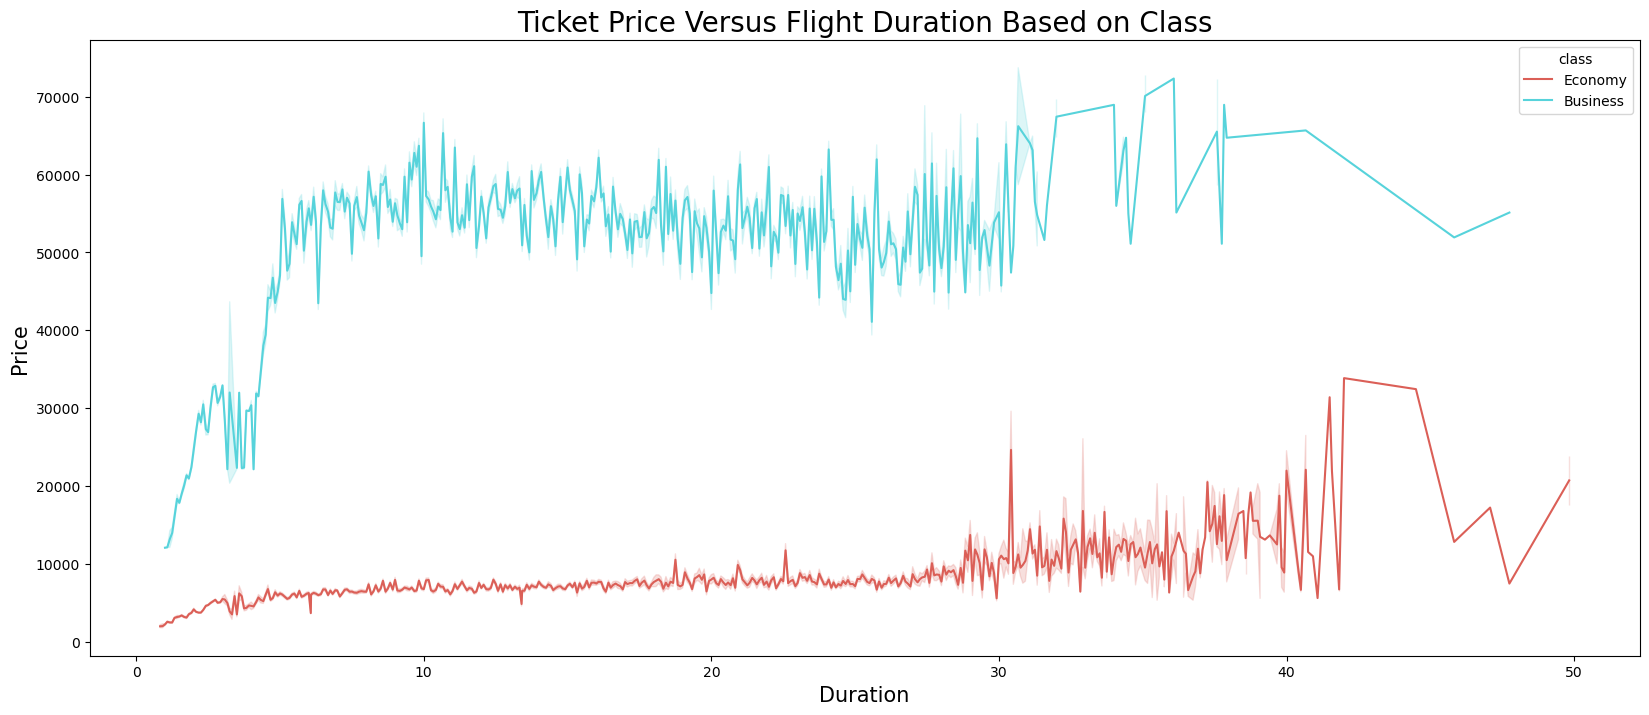

In [253]:
#plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=bus,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

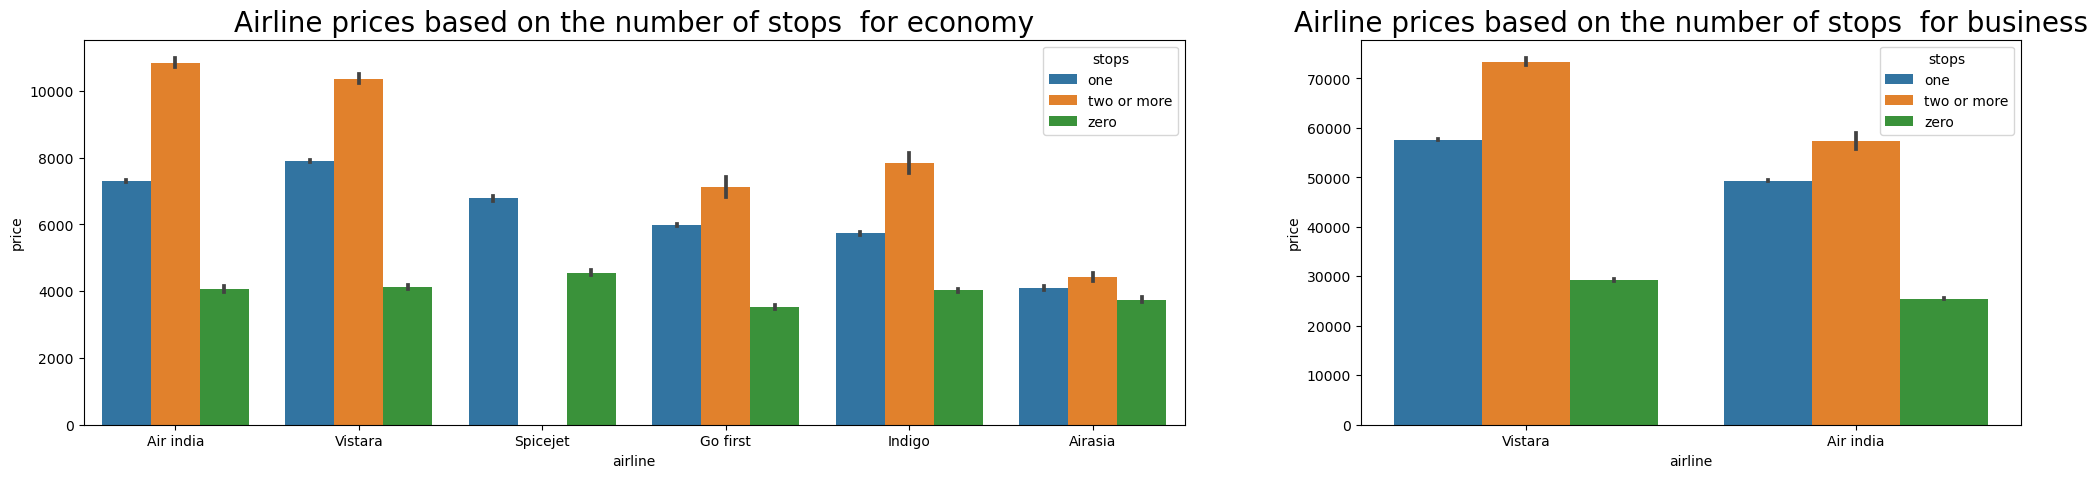

In [254]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = bus.loc[bus["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
sns.barplot(y = "price", x = "airline",hue="stops",data = bus.loc[bus["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

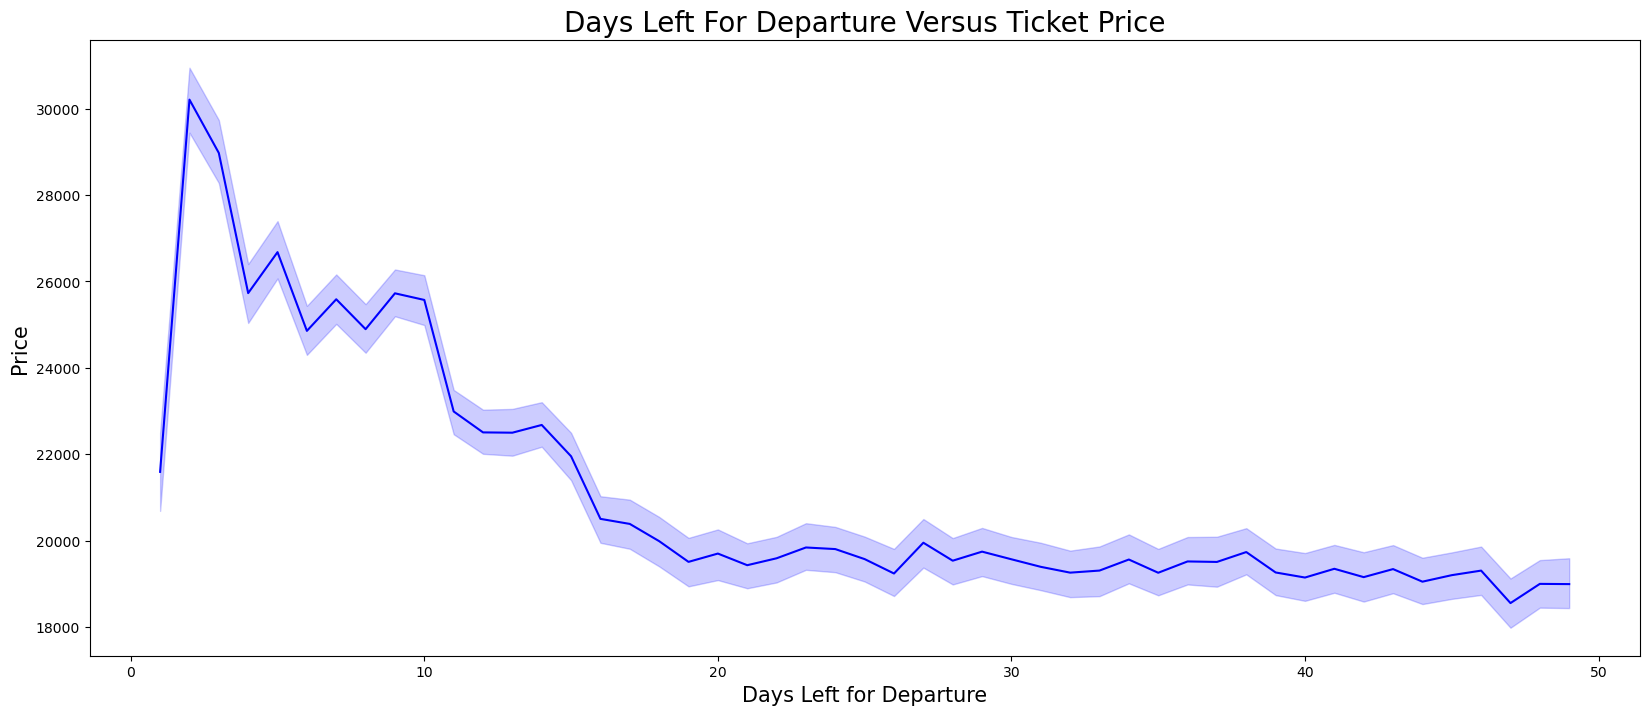

In [255]:
plt.figure(figsize=(20,8))
sns.lineplot(data=bus,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

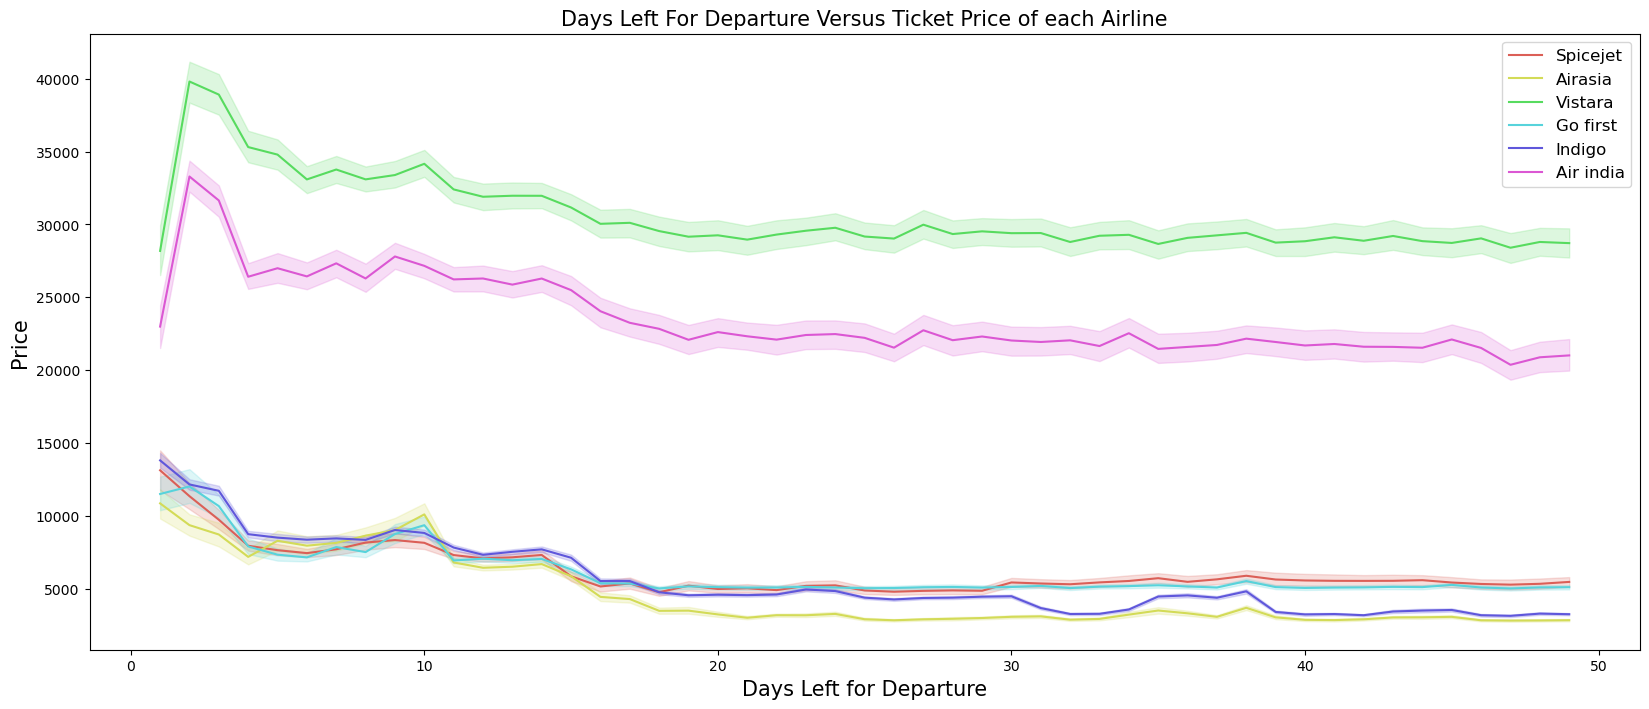

In [256]:
plt.figure(figsize=(20,8))
sns.lineplot(data=bus,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# AIRLINE VS PRICE

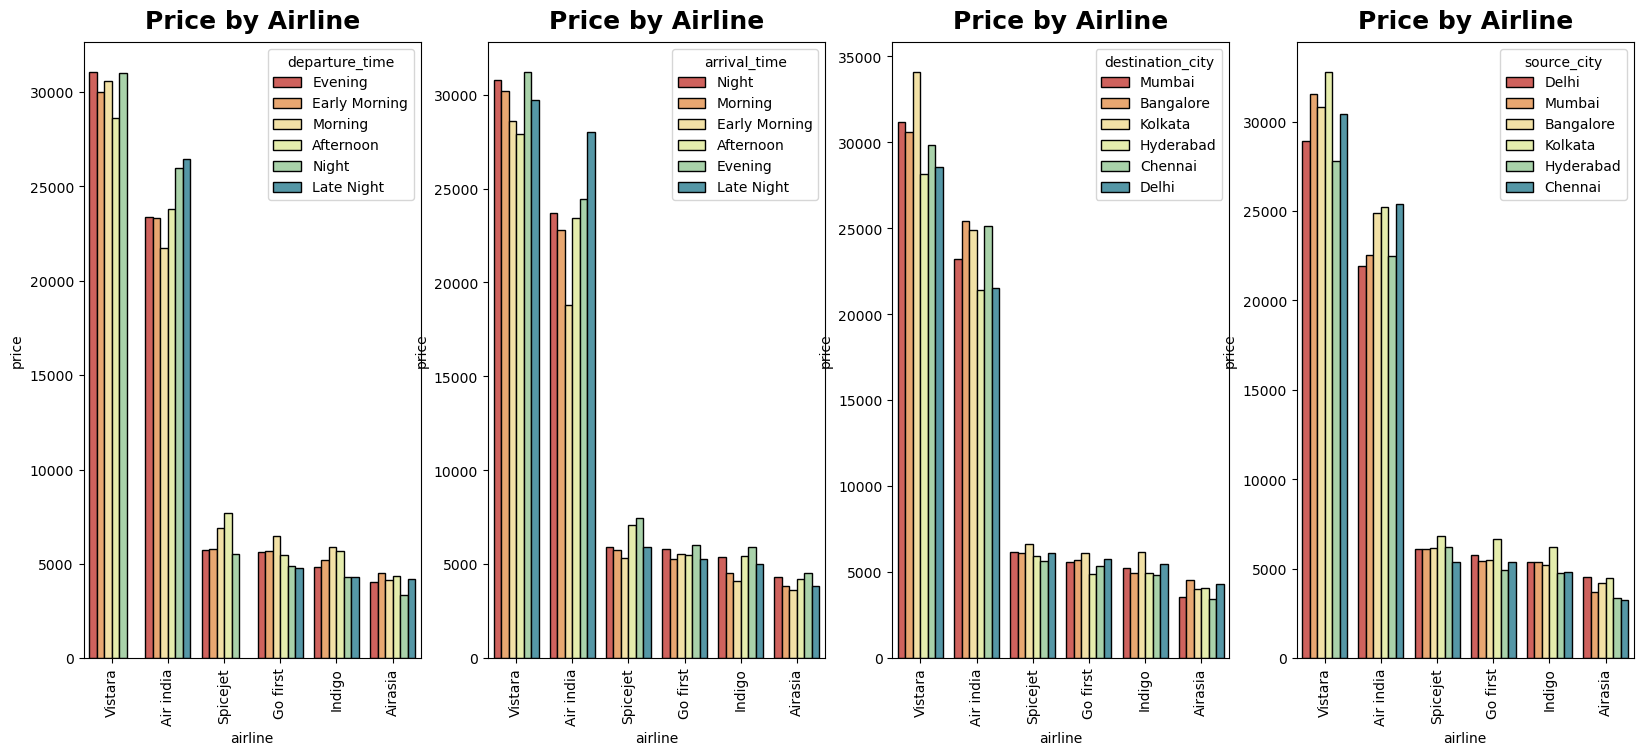

In [257]:
def categorical_visualization(cols):
    y="Price"
    plt.figure(figsize=(20,8))
    plt.subplot(1,4,1)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="departure_time",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by Airline',pad=10,fontweight="black",fontsize=18)
    
   
    
    plt.subplot(1,4,2)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="arrival_time",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by Airline',pad=10,fontweight="black",fontsize=18)
    





    
    plt.subplot(1,4,3)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="destination_city",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
   # ax.bar_label(ax.containers[0])
    plt.title(f'{y} by Airline',pad=10,fontweight="black",fontsize=18)
    
    plt.subplot(1,4,4)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                 
                   hue="source_city",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by Airline',pad=10,fontweight="black",fontsize=18)
    

    
    plt.show()

categorical_visualization("airline")

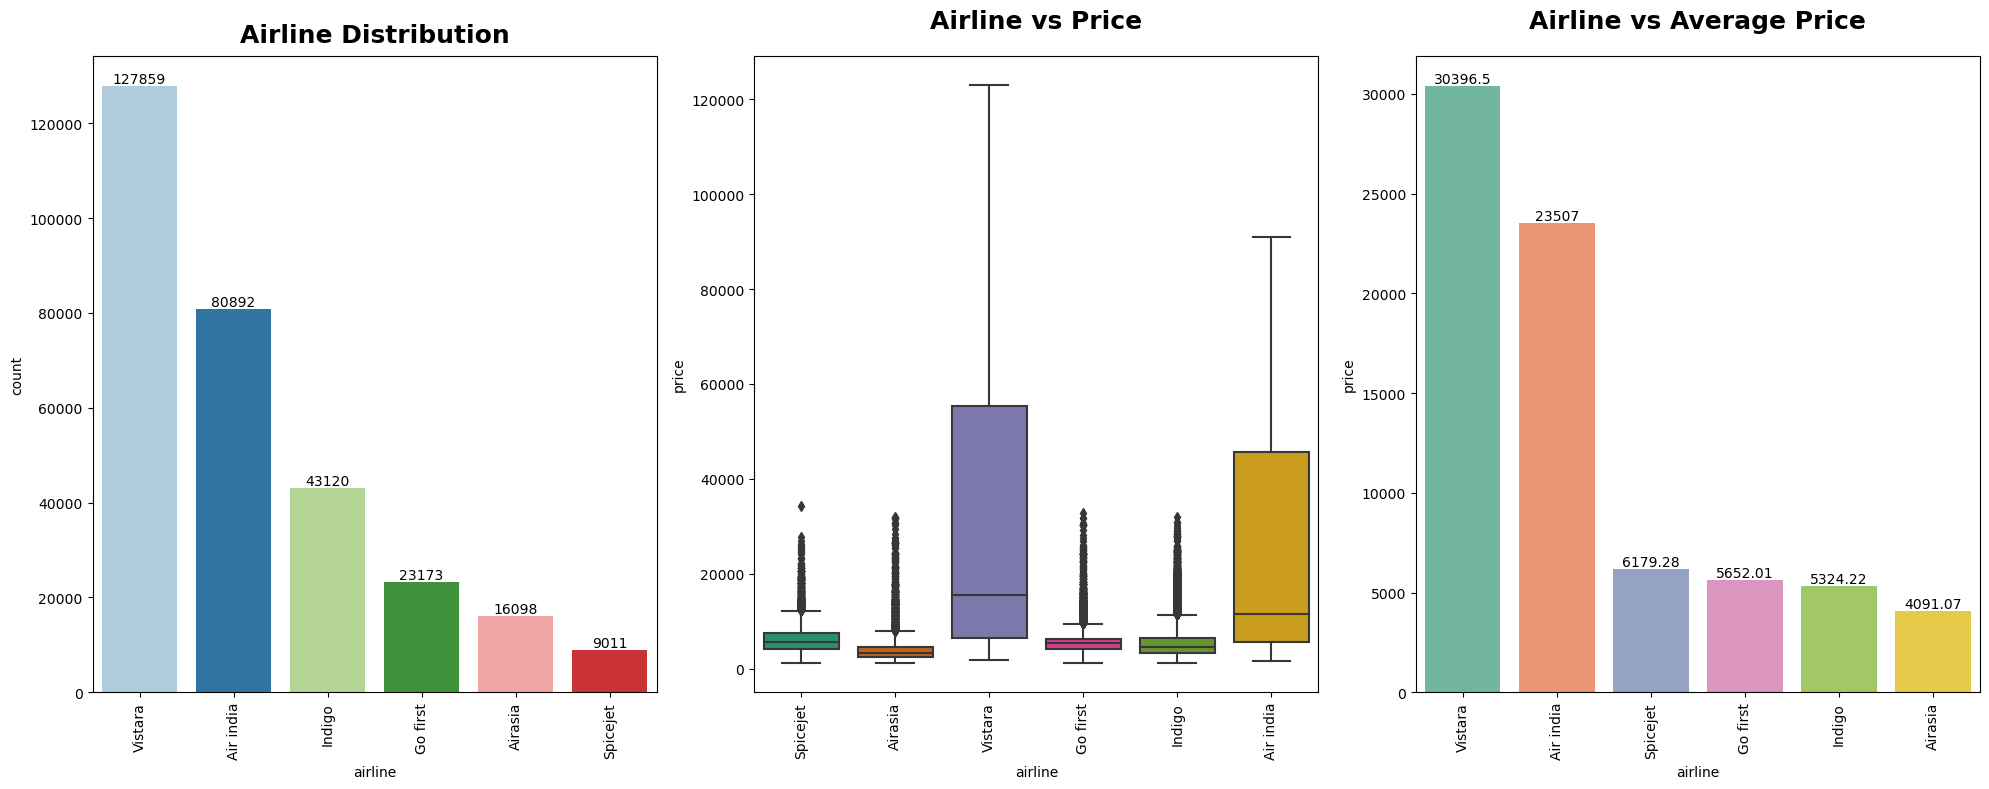

In [258]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    ax= sns.countplot(x=cols,data=bus,palette="Paired",order=bus[cols].value_counts().index)
    plt.title(f"{cols.capitalize()} Distribution",pad=10,fontweight="black",fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=bus,palette="Dark2")
    plt.title(f"{cols.capitalize()} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(bus.groupby(cols)["price"].mean().sort_values(ascending=False))
    ax=sns.barplot(x=x.index,y="price",data=x,palette="Set2")
    plt.title(f"{cols.capitalize()} vs Average Price",pad=20,fontweight="black",fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.tight_layout()
    plt.show()

categorical_visualization("airline")

# SOURCE CITY VS PRICE 

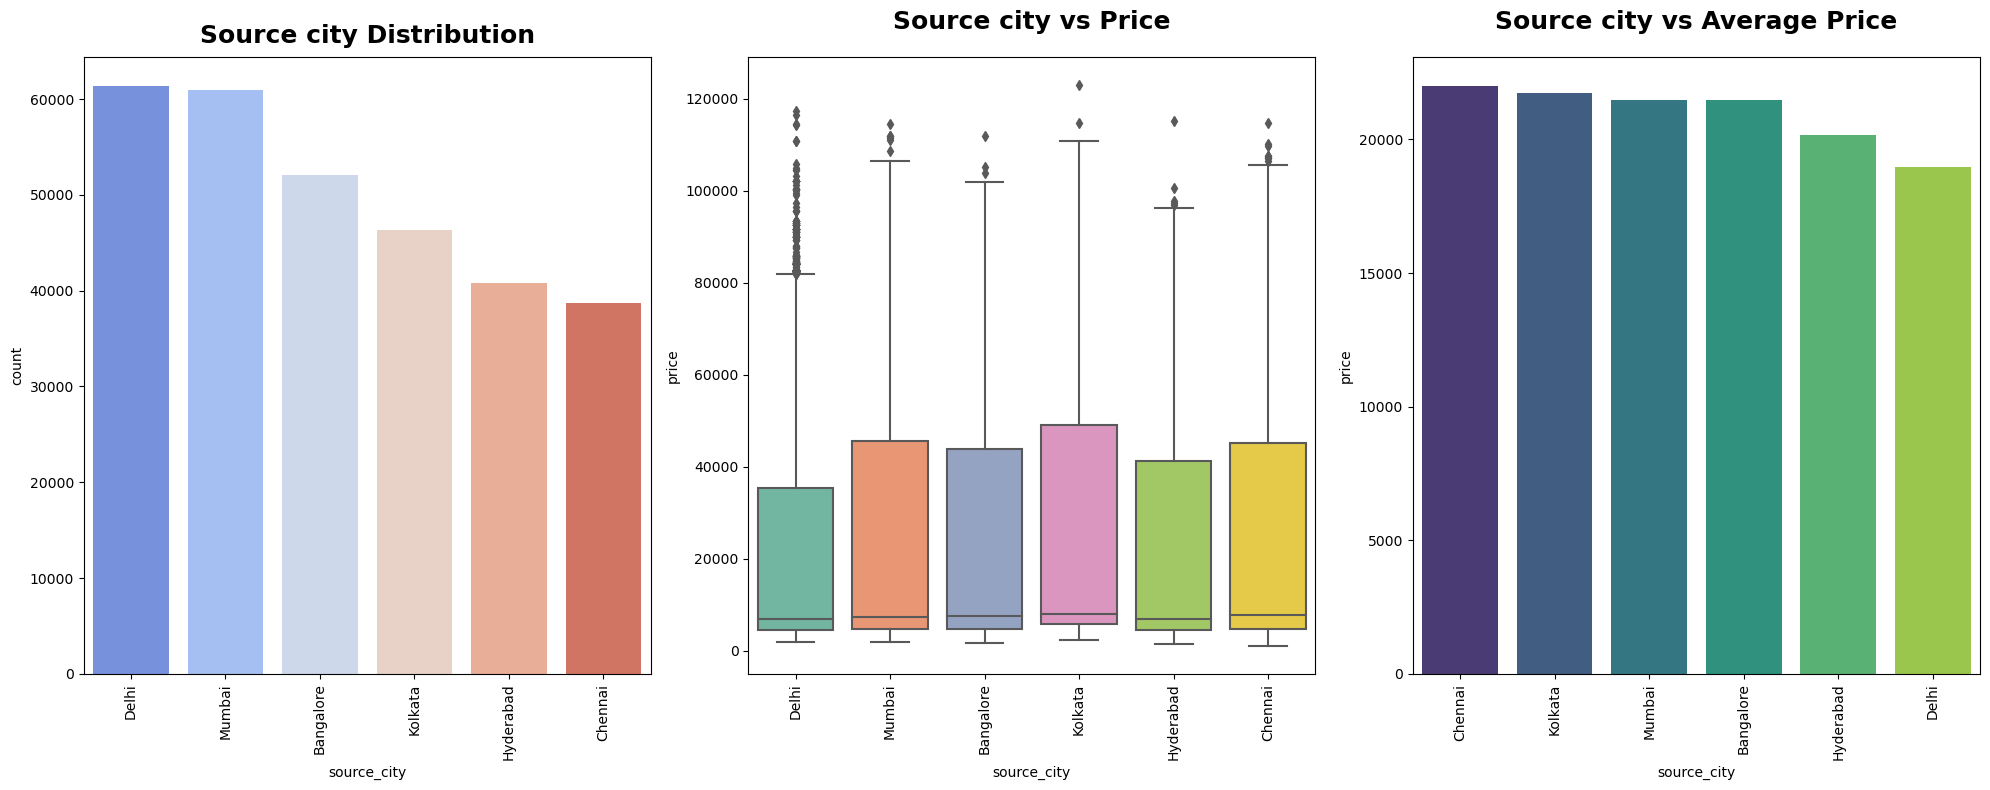

In [259]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=bus,palette="coolwarm",order=bus[cols].value_counts().index)
    plt.title(f'{cols.capitalize().replace("_"," ")} Distribution',pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=bus,palette="Set2")
    plt.title(f"{cols.capitalize().replace('_',' ')} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(bus.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="viridis")
    plt.title(f"{cols.capitalize().replace('_',' ')} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

categorical_visualization("source_city")

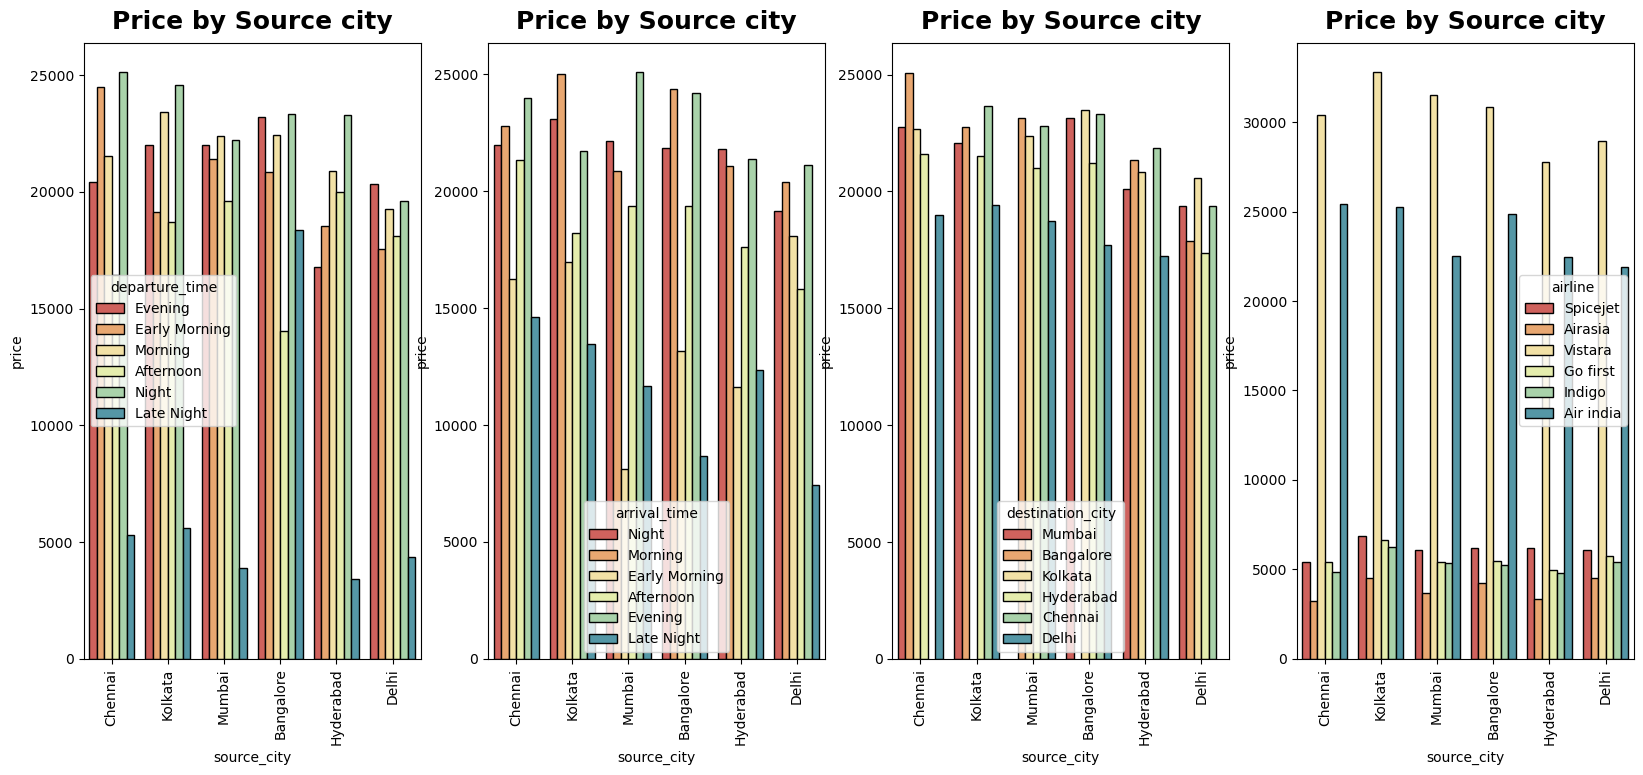

In [260]:
def categorical_visualization(cols):
    y="Price"
    plt.figure(figsize=(20,8))
    plt.subplot(1,4,1)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="departure_time",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize().replace("_"," ")}',pad=10,fontweight="black",fontsize=18)
    
   
    
    plt.subplot(1,4,2)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="arrival_time",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize().replace("_"," ")}',pad=10,fontweight="black",fontsize=18)
    





    
    plt.subplot(1,4,3)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="destination_city",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
   # ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize().replace("_"," ")}',pad=10,fontweight="black",fontsize=18)
    
    plt.subplot(1,4,4)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                 
                   hue="airline",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize().replace("_"," ")}',pad=10,fontweight="black",fontsize=18)
    

    
    plt.show()

categorical_visualization("source_city")

# DEPARTURE TIME VS PRICE

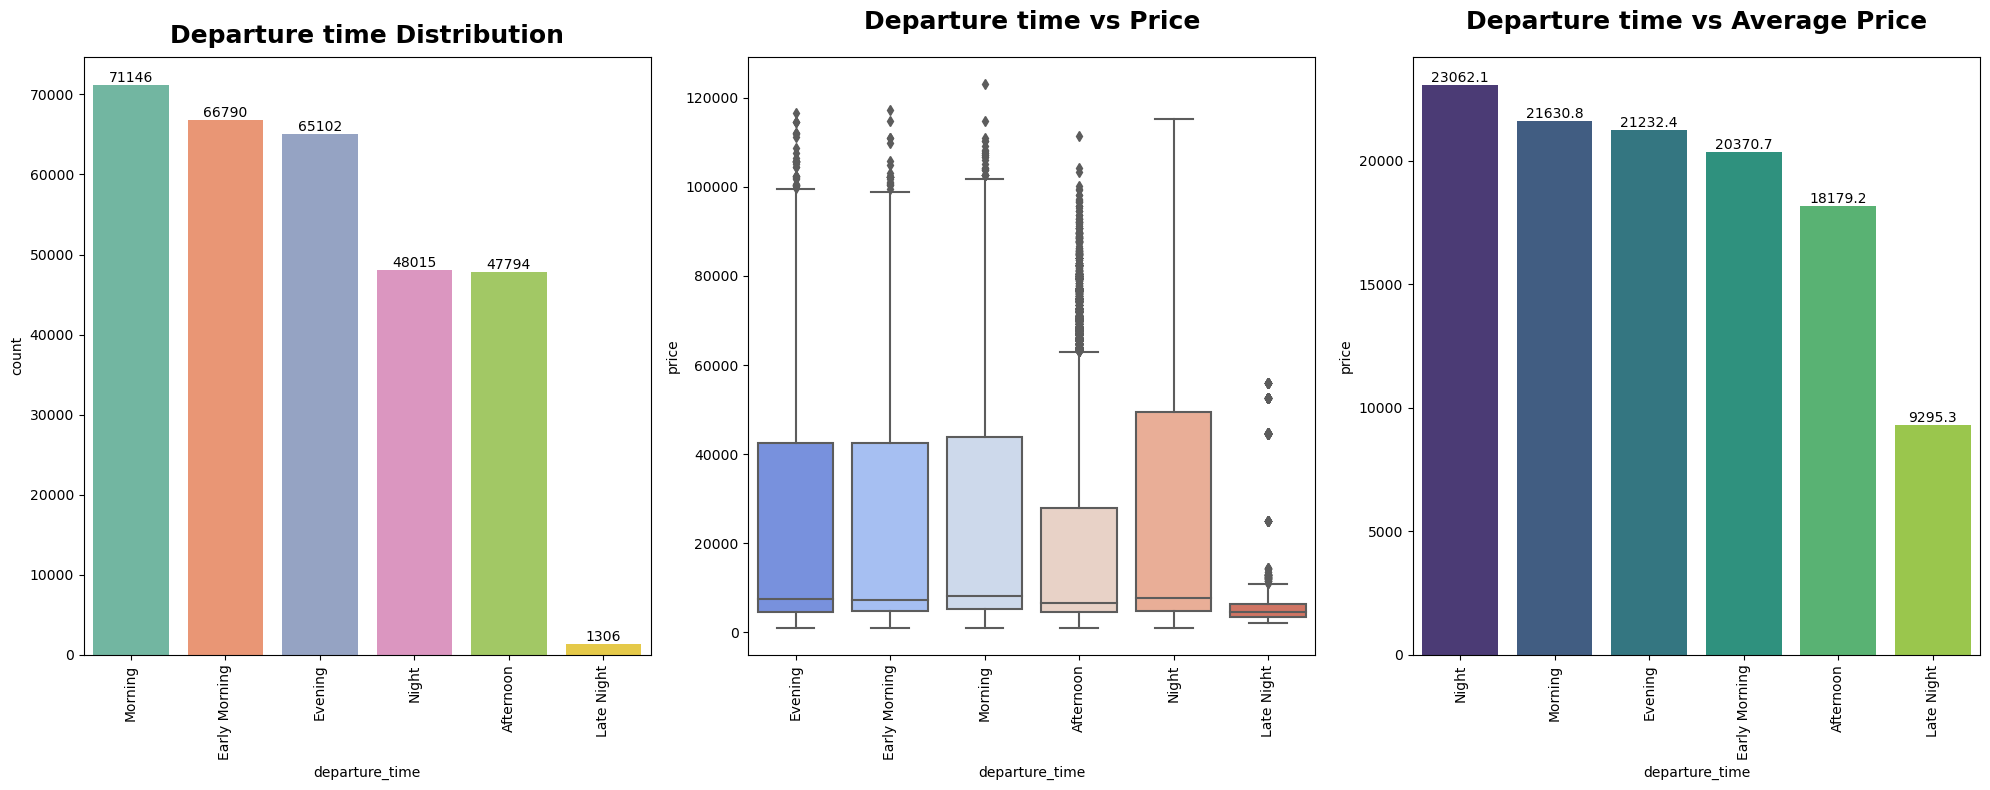

In [261]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    ax=sns.countplot(x=cols,data=bus,palette="Set2",order=bus[cols].value_counts().index)
    plt.title(f"{cols.capitalize().replace('_',' ')} Distribution",pad=10,fontweight="black",fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=bus,palette="coolwarm")
    plt.title(f"{cols.capitalize().replace('_',' ')} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(bus.groupby(cols)["price"].mean().sort_values(ascending=False))
    ax=sns.barplot(x=x.index,y="price",data=x,palette="viridis")
    plt.title(f"{cols.capitalize().replace('_',' ')} vs Average Price",pad=20,fontweight="black",fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.tight_layout()
    plt.show()

categorical_visualization("departure_time")

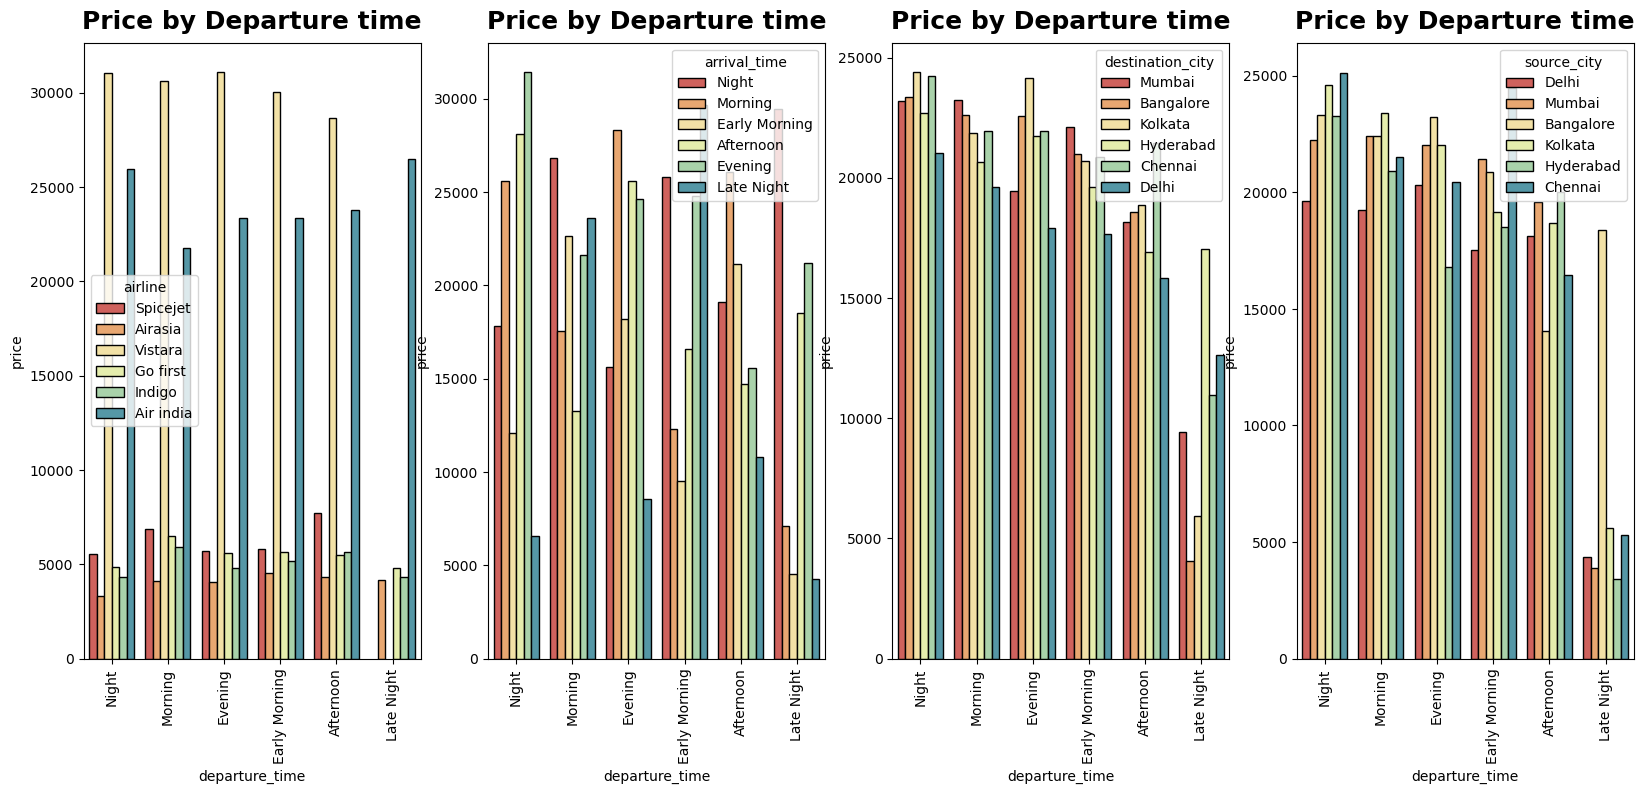

In [262]:
def categorical_visualization(cols):
    y="Price"
    plt.figure(figsize=(20,8))
    plt.subplot(1,4,1)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="airline",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize().replace("_"," ")}',pad=10,fontweight="black",fontsize=18)
    
   
    
    plt.subplot(1,4,2)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="arrival_time",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize().replace("_"," ")}',pad=10,fontweight="black",fontsize=18)
    





    
    plt.subplot(1,4,3)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="destination_city",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
   # ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize().replace("_"," ")}',pad=10,fontweight="black",fontsize=18)
    
    plt.subplot(1,4,4)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                 
                   hue="source_city",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize().replace("_"," ")}',pad=10,fontweight="black",fontsize=18)
    

    
    plt.show()

categorical_visualization("departure_time")

# DESTINATION CITY

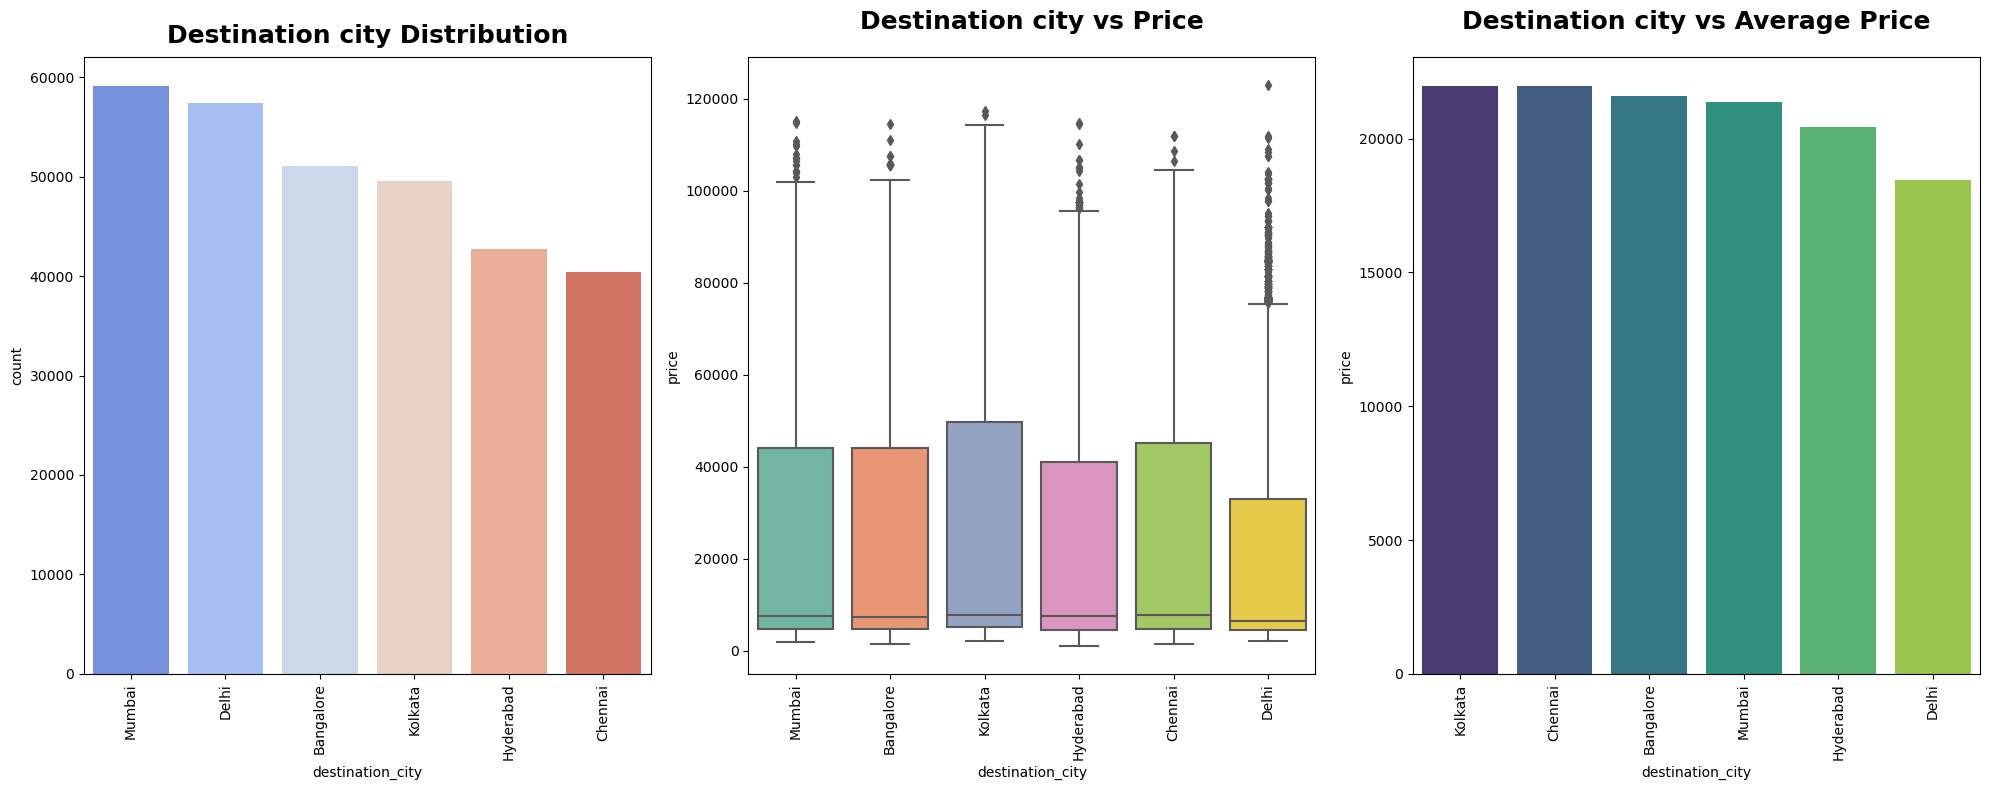

In [263]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=bus,palette="coolwarm",order=bus[cols].value_counts().index)
    plt.title(f"{cols.capitalize().replace('_',' ')} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=bus,palette="Set2")
    plt.title(f"{cols.capitalize().replace('_',' ')} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(bus.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="viridis")
    plt.title(f"{cols.capitalize().replace('_',' ')} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

categorical_visualization("destination_city")

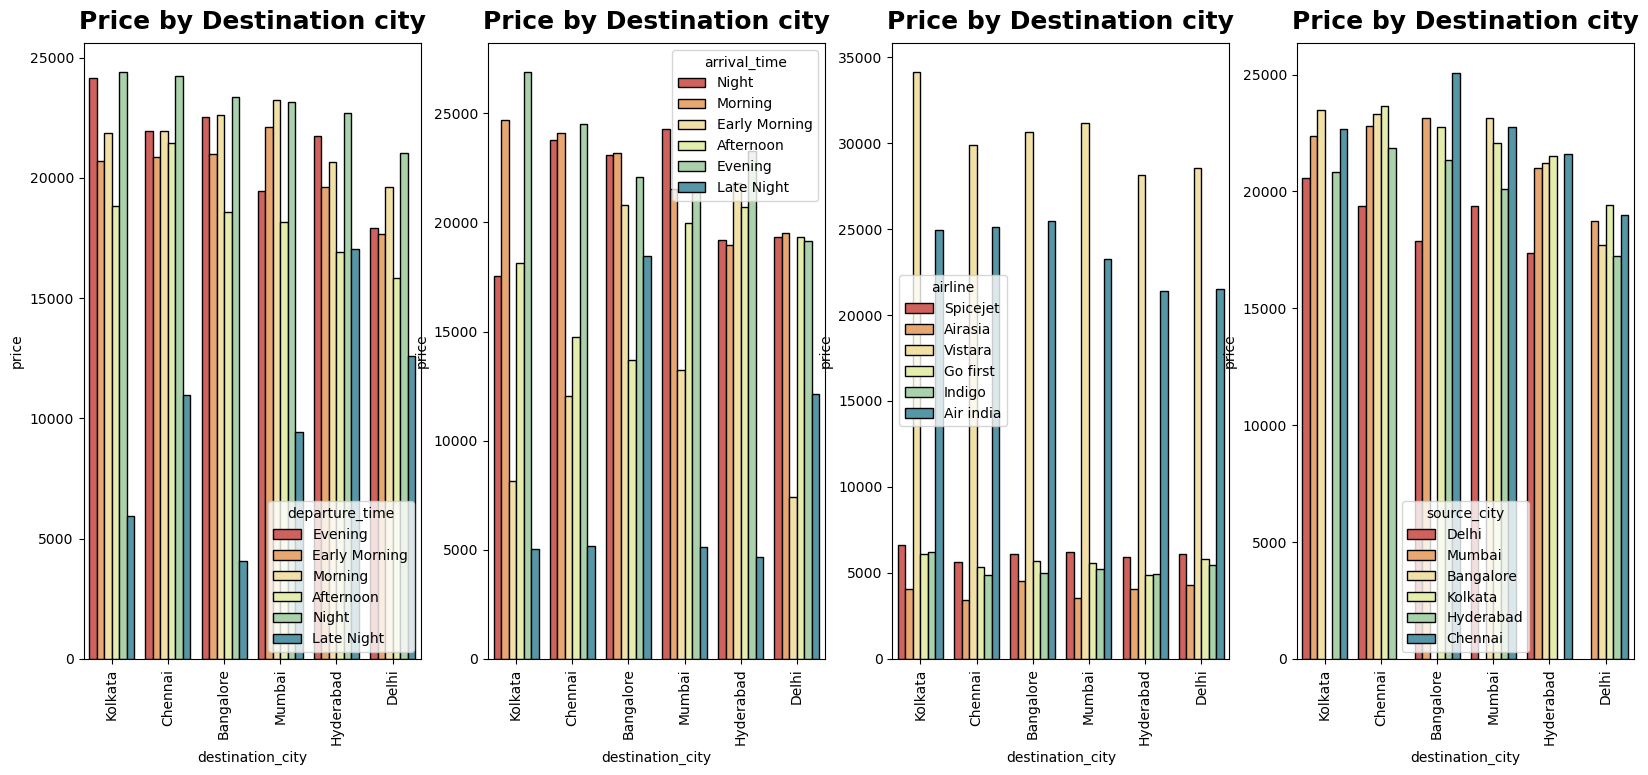

In [264]:
def categorical_visualization(cols):
    y="Price"
    plt.figure(figsize=(20,8))
    plt.subplot(1,4,1)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="departure_time",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize().replace("_"," ")}',pad=10,fontweight="black",fontsize=18)
    
   
    
    plt.subplot(1,4,2)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="arrival_time",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize().replace("_"," ")}',pad=10,fontweight="black",fontsize=18)
    





    
    plt.subplot(1,4,3)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="airline",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
   # ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize().replace("_"," ")}',pad=10,fontweight="black",fontsize=18)
    
    plt.subplot(1,4,4)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                 
                   hue="source_city",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize().replace("_"," ")}',pad=10,fontweight="black",fontsize=18)
    

    
    plt.show()

categorical_visualization("destination_city")

# CLASS VS PRICE

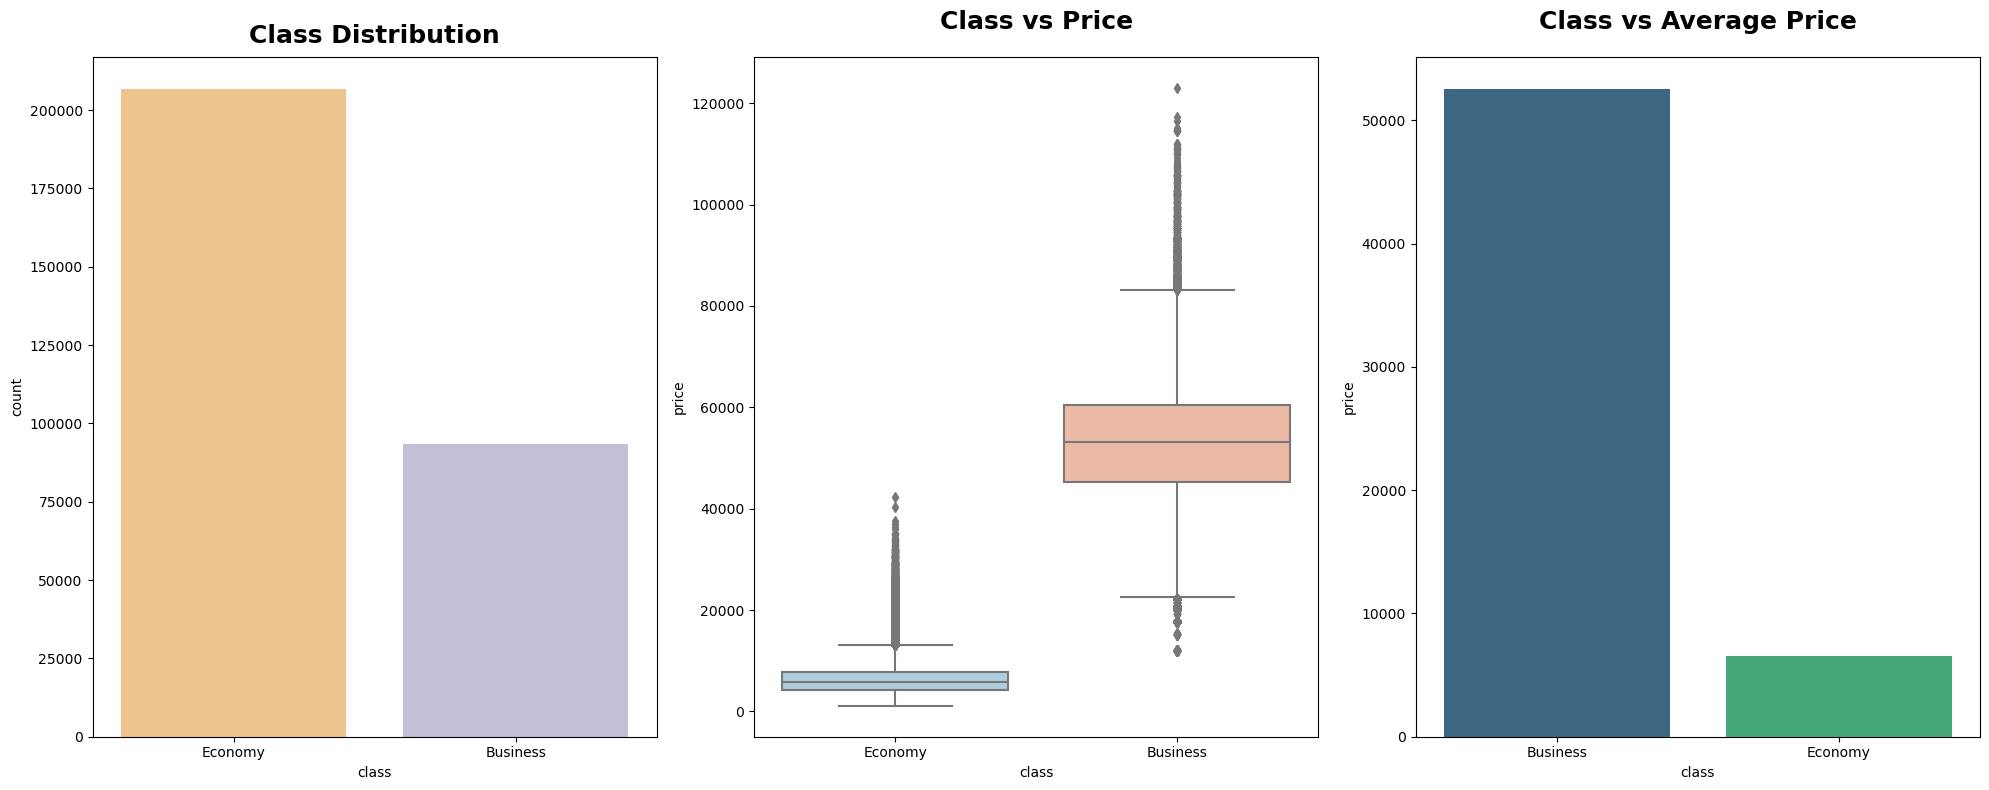

In [265]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=bus,palette="PuOr",order=bus[cols].value_counts().index)
    plt.title(f"{cols.capitalize()} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=bus,palette="RdBu_r")
    plt.title(f"{cols.capitalize()} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(bus.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="viridis")
    plt.title(f"{cols.capitalize()} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

categorical_visualization("class")

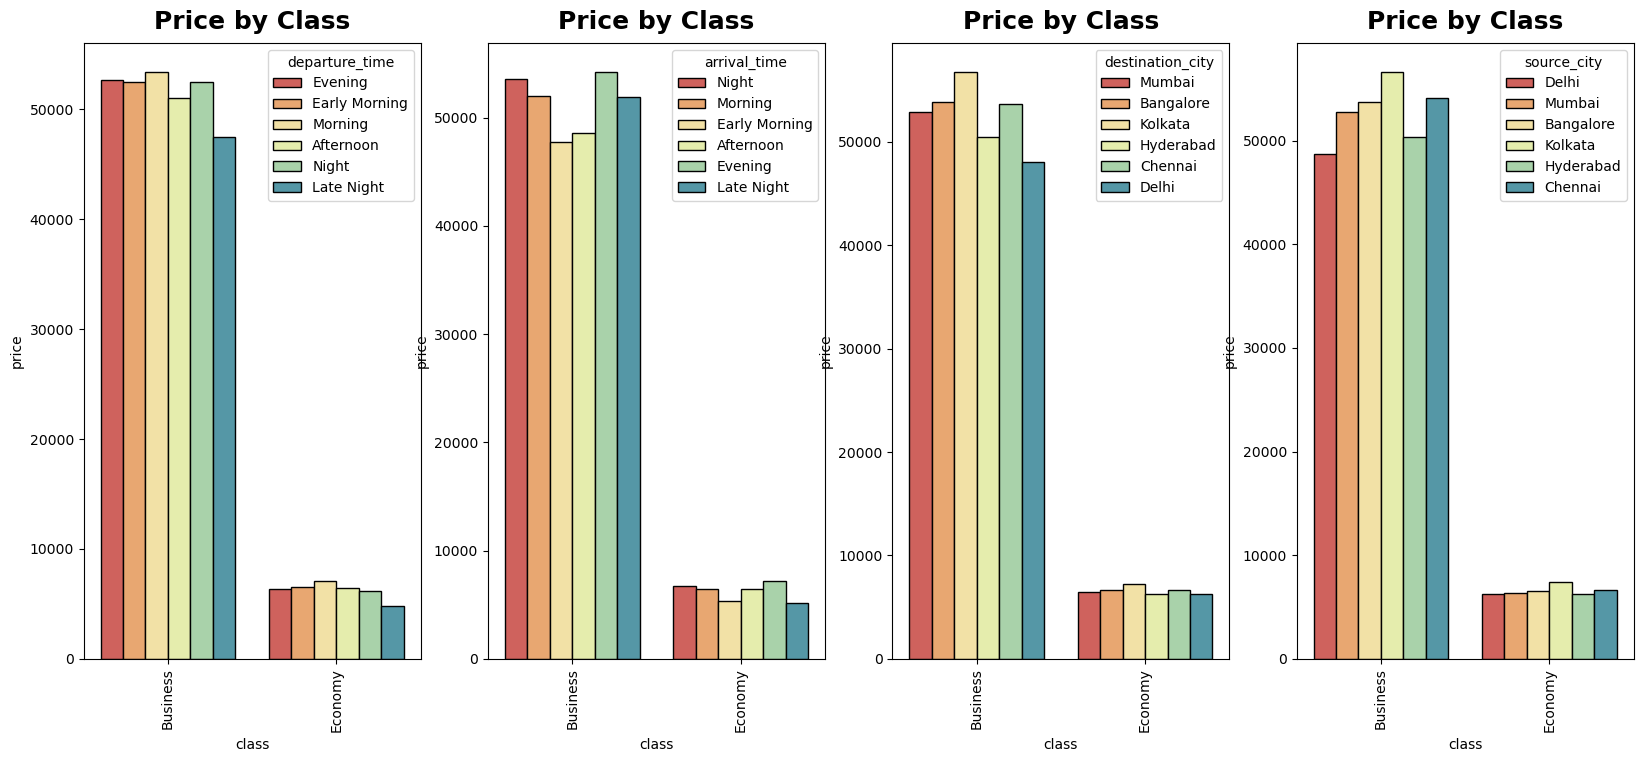

In [266]:
def categorical_visualization(cols):
    y="Price"
    plt.figure(figsize=(20,8))
    plt.subplot(1,4,1)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="departure_time",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize().replace("_"," ")}',pad=10,fontweight="black",fontsize=18)
    
   
    
    plt.subplot(1,4,2)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="arrival_time",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize().replace("_"," ")}',pad=10,fontweight="black",fontsize=18)
    





    
    plt.subplot(1,4,3)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="destination_city",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
   # ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize().replace("_"," ")}',pad=10,fontweight="black",fontsize=18)
    
    plt.subplot(1,4,4)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                 
                   hue="source_city",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize().replace("_"," ")}',pad=10,fontweight="black",fontsize=18)
    

    
    plt.show()

categorical_visualization("class")

# FLIGHT CARRIER

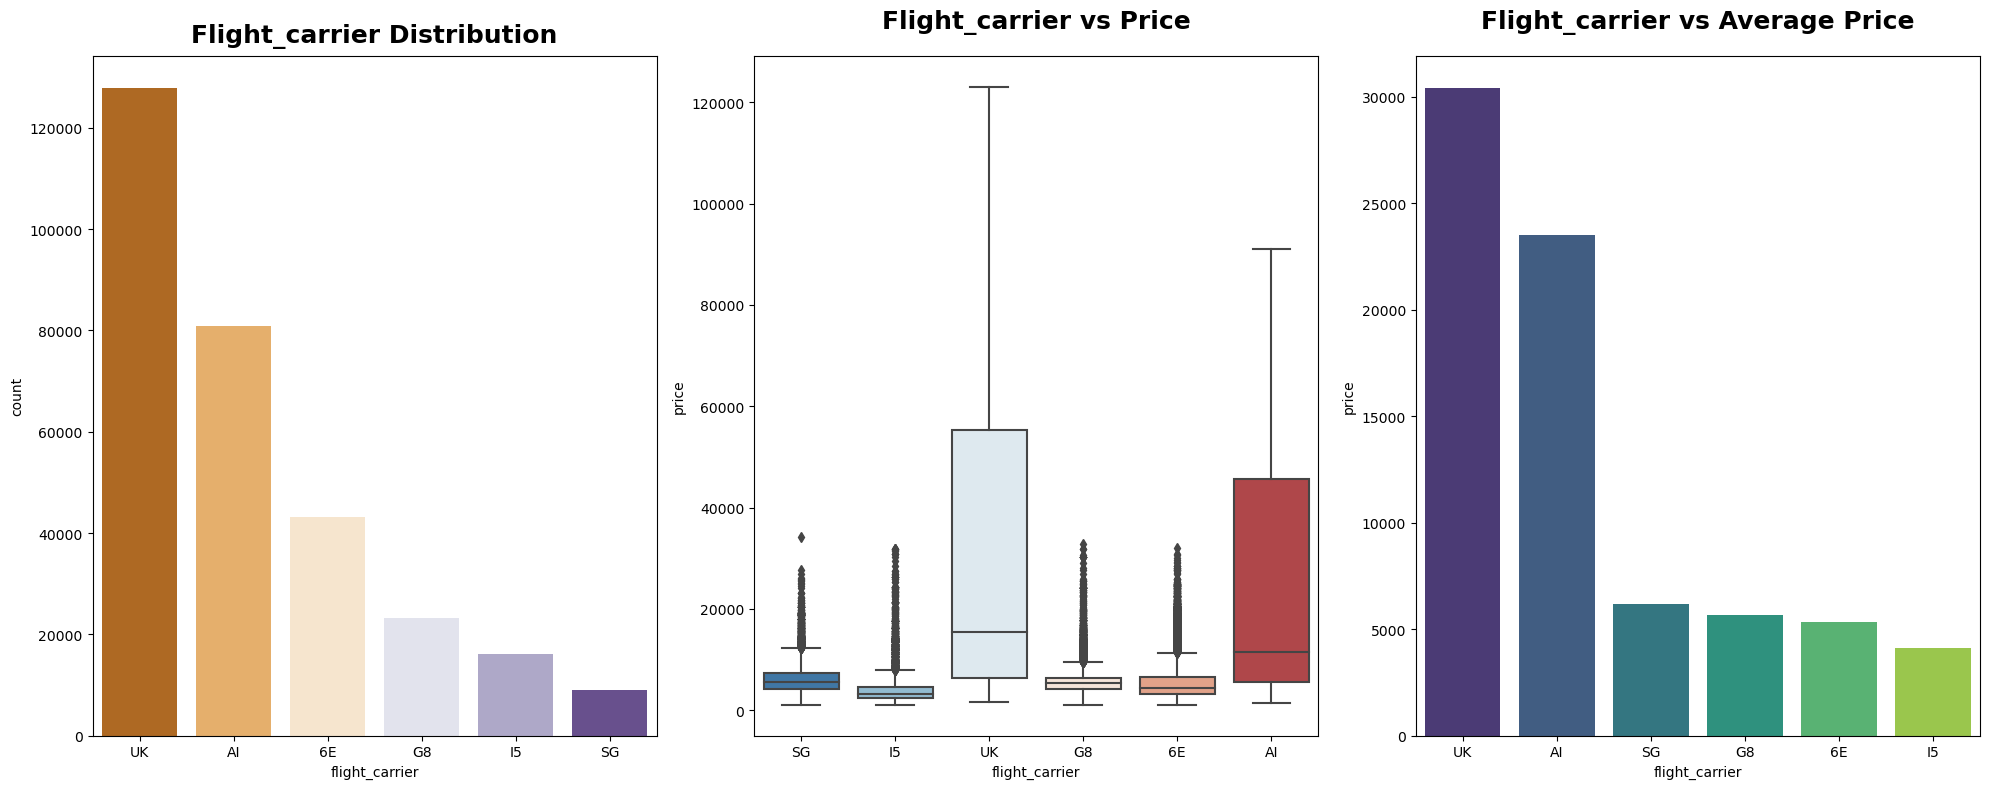

In [267]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=bus,palette="PuOr",order=bus[cols].value_counts().index)
    plt.title(f"{cols.capitalize()} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=bus,palette="RdBu_r")
    plt.title(f"{cols.capitalize()} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(bus.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="viridis")
    plt.title(f"{cols.capitalize()} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

categorical_visualization("flight_carrier")

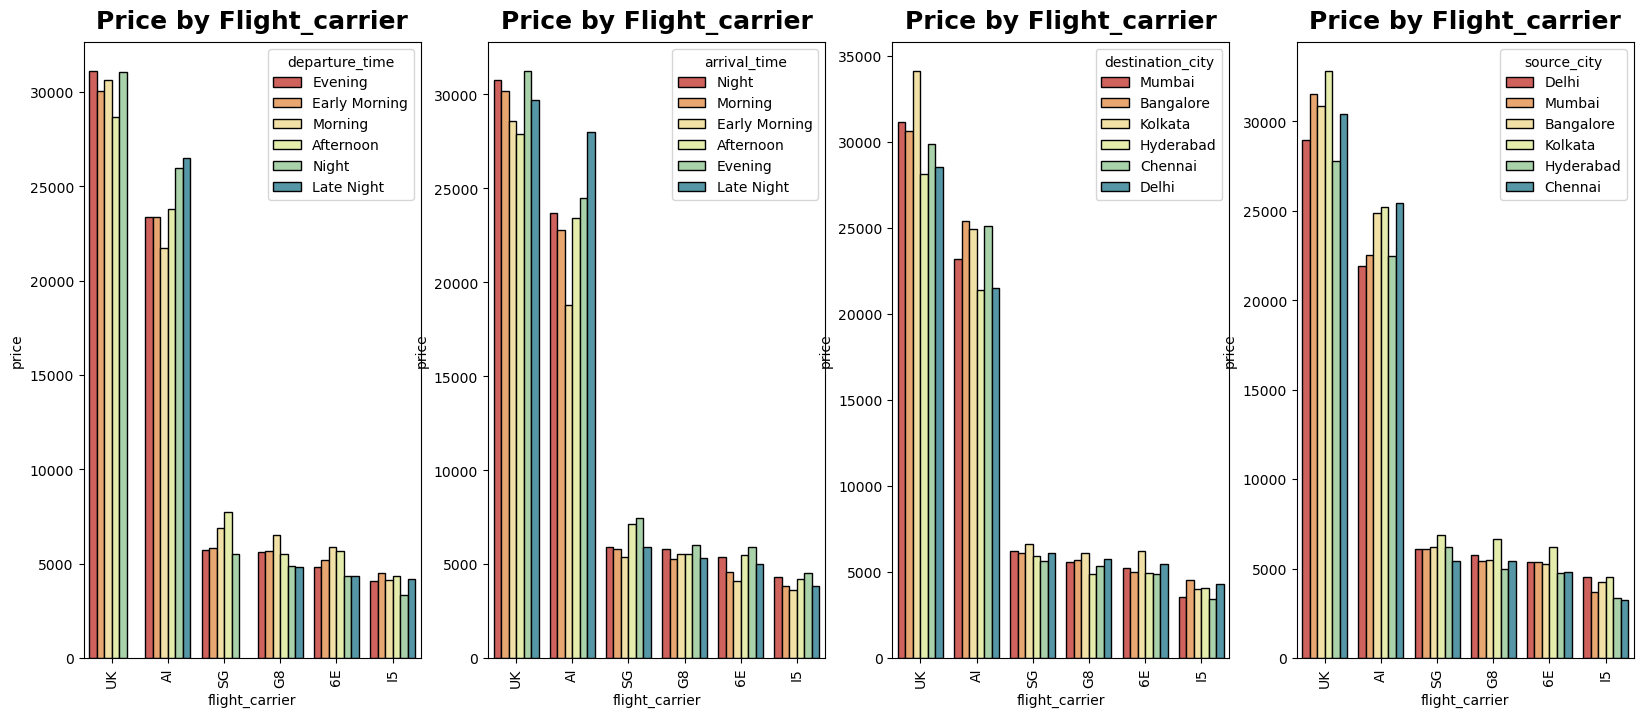

In [268]:
def categorical_visualization(cols):
    y="Price"
    plt.figure(figsize=(20,8))
    plt.subplot(1,4,1)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="departure_time",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize()}',pad=10,fontweight="black",fontsize=18)
    
   
    
    plt.subplot(1,4,2)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="arrival_time",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize()}',pad=10,fontweight="black",fontsize=18)
    





    
    plt.subplot(1,4,3)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="destination_city",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
   # ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize()}',pad=10,fontweight="black",fontsize=18)
    
    plt.subplot(1,4,4)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                 
                   hue="source_city",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize()}',pad=10,fontweight="black",fontsize=18)
    

    
    plt.show()

categorical_visualization("flight_carrier")

# ARRIVAL TIME

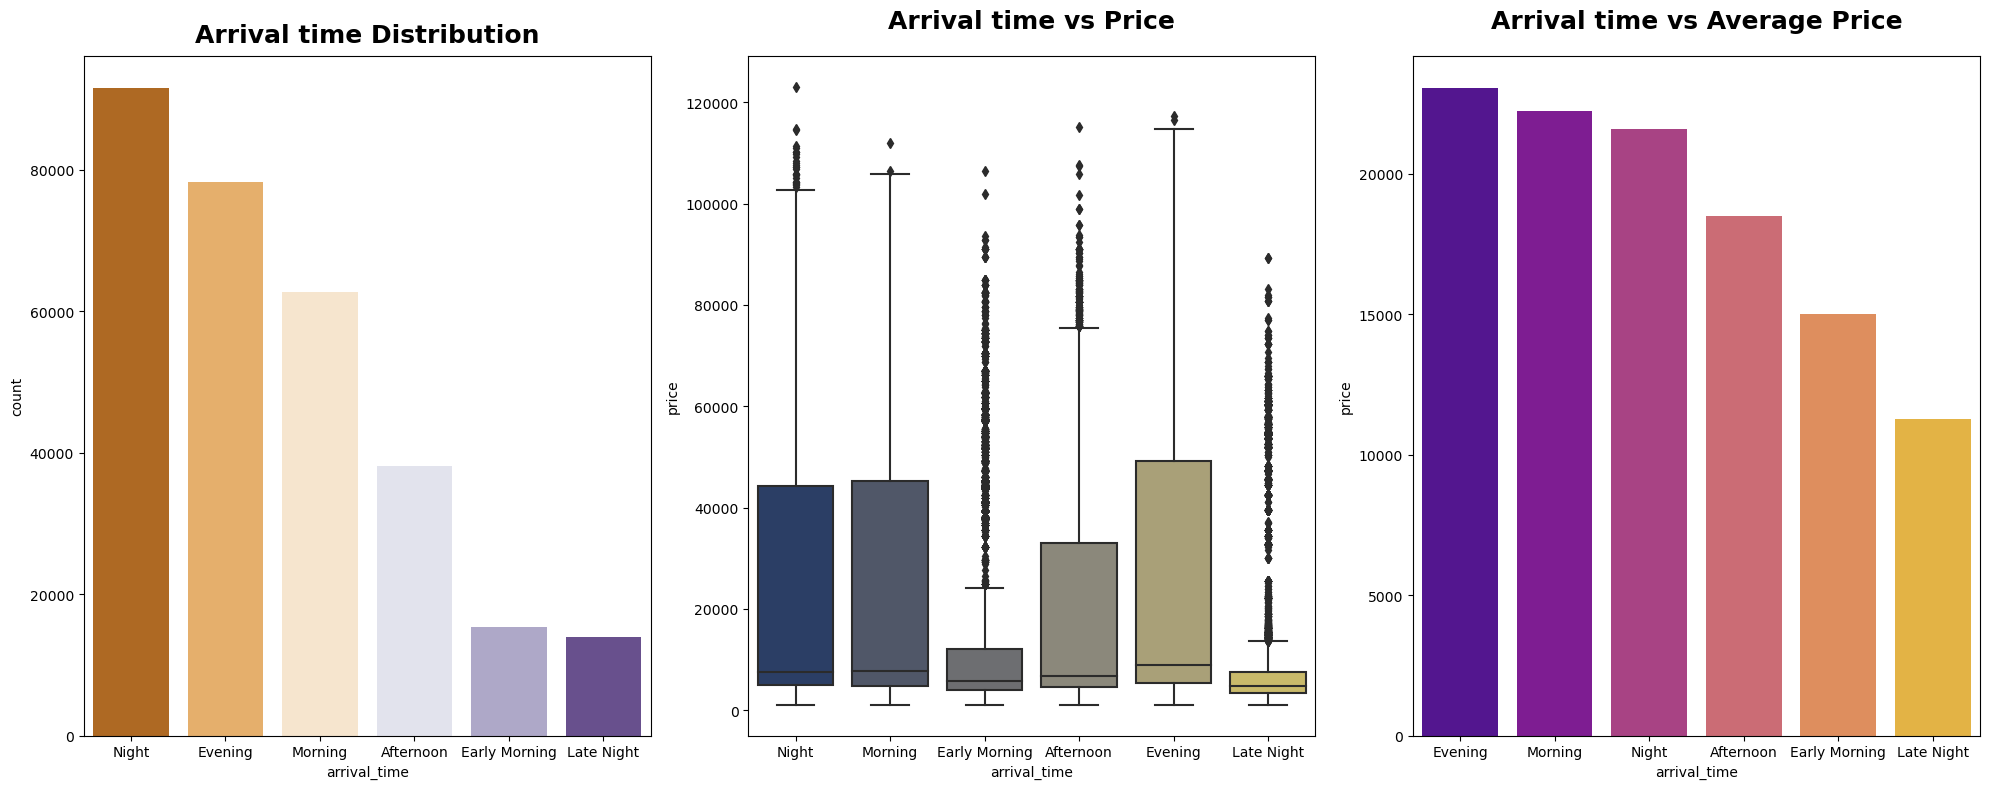

In [269]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=bus,palette="PuOr",order=bus[cols].value_counts().index)
    plt.title(f"{cols.capitalize().replace('_',' ')} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=bus,palette="cividis")
    plt.title(f"{cols.capitalize().replace('_',' ')} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(bus.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="plasma")
    plt.title(f"{cols.capitalize().replace('_',' ')} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

categorical_visualization("arrival_time")

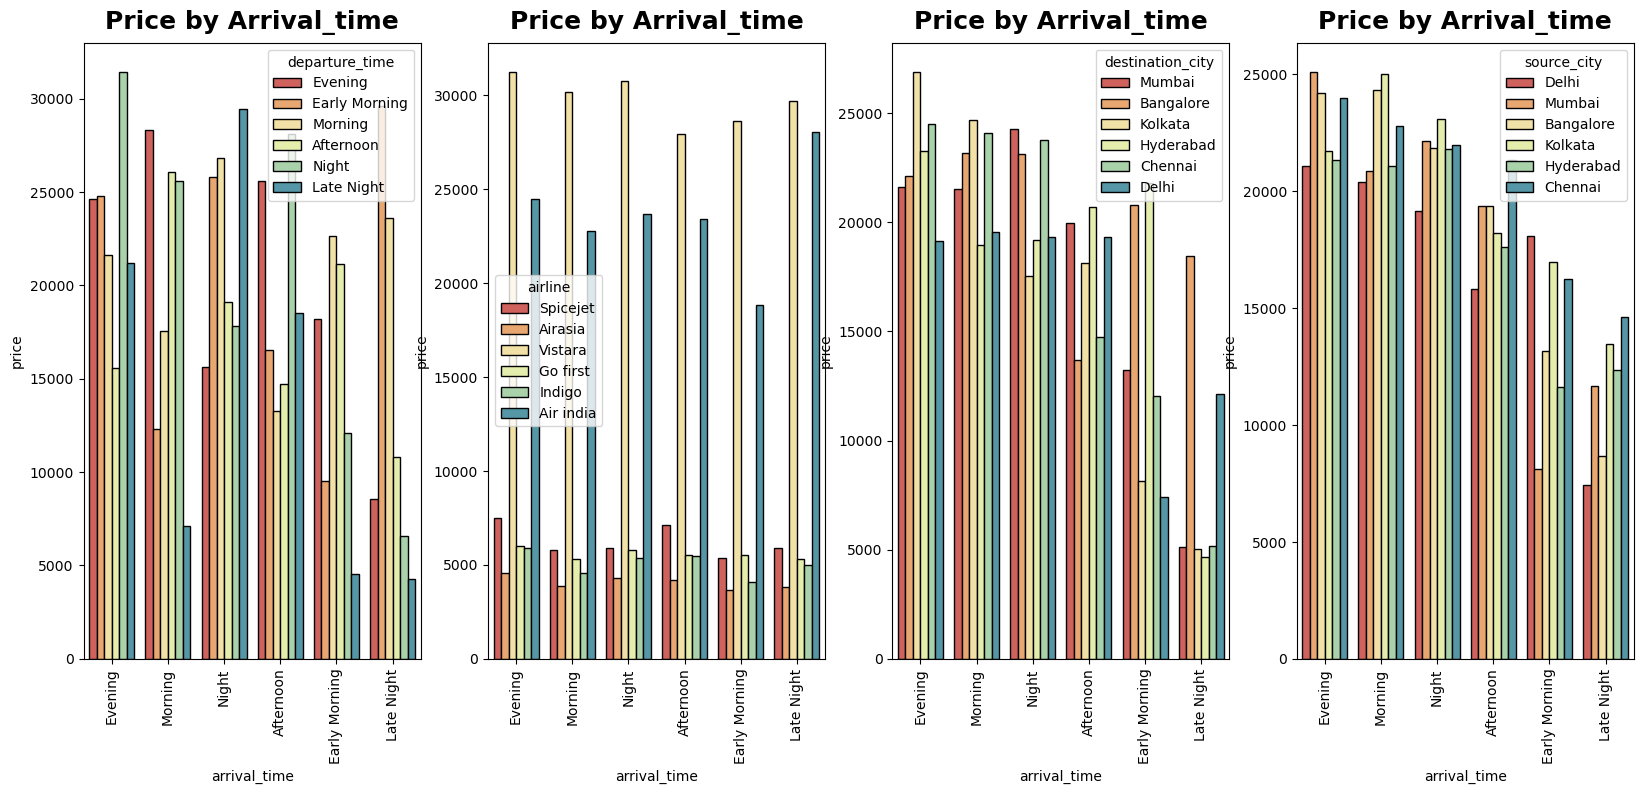

In [270]:
def categorical_visualization(cols):
    y="Price"
    plt.figure(figsize=(20,8))
    plt.subplot(1,4,1)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="departure_time",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize()}',pad=10,fontweight="black",fontsize=18)
    
   
    
    plt.subplot(1,4,2)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="airline",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize()}',pad=10,fontweight="black",fontsize=18)
    





    
    plt.subplot(1,4,3)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="destination_city",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
   # ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize()}',pad=10,fontweight="black",fontsize=18)
    
    plt.subplot(1,4,4)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                 
                   hue="source_city",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize()}',pad=10,fontweight="black",fontsize=18)
    

    
    plt.show()

categorical_visualization("arrival_time")

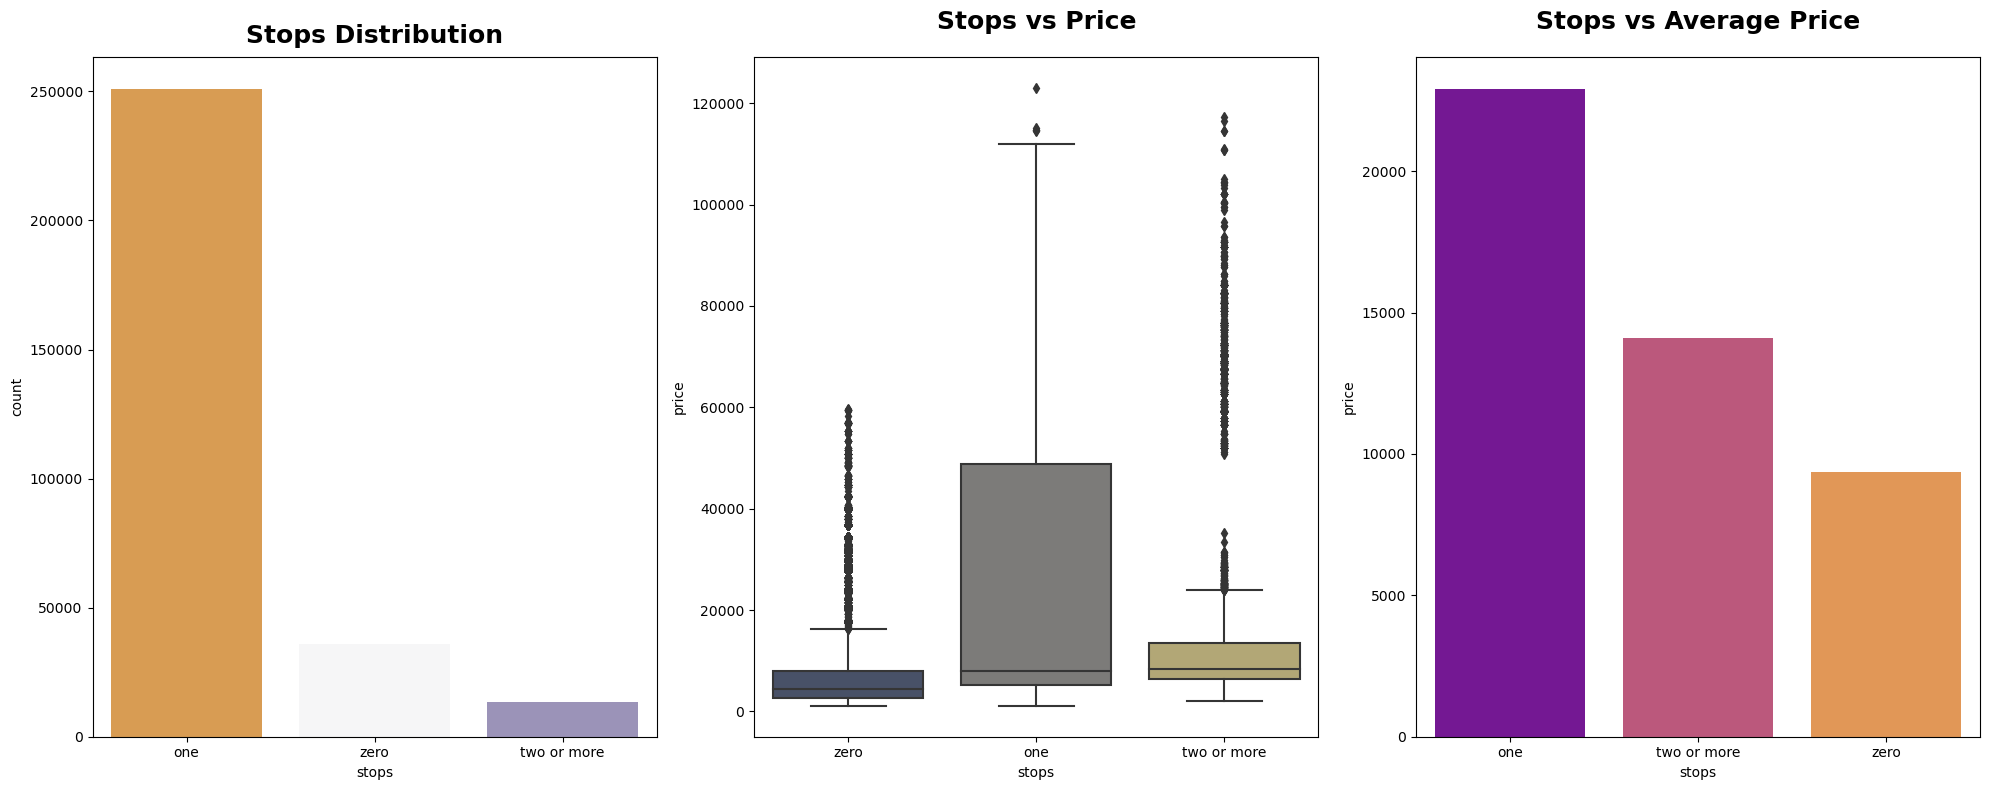

In [271]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=bus,palette="PuOr",order=bus[cols].value_counts().index)
    plt.title(f"{cols.capitalize().replace('_',' ')} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=bus,palette="cividis")
    plt.title(f"{cols.capitalize().replace('_',' ')} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(bus.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="plasma")
    plt.title(f"{cols.capitalize().replace('_',' ')} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

categorical_visualization("stops")

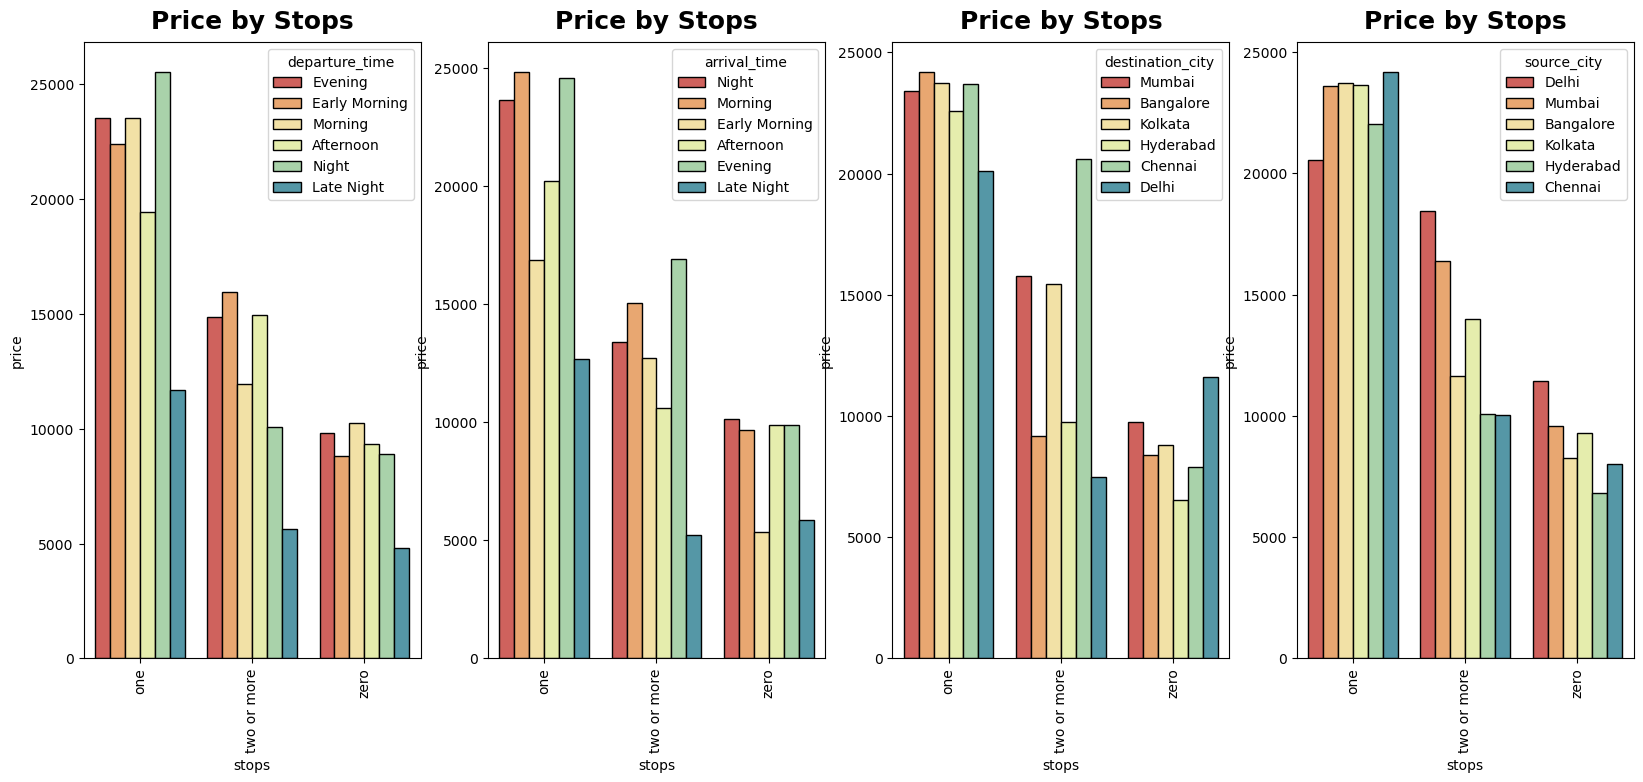

In [272]:
def categorical_visualization(cols):
    y="Price"
    plt.figure(figsize=(20,8))
    plt.subplot(1,4,1)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="departure_time",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize()}',pad=10,fontweight="black",fontsize=18)
    
   
    
    plt.subplot(1,4,2)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="arrival_time",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize()}',pad=10,fontweight="black",fontsize=18)
    





    
    plt.subplot(1,4,3)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                   hue="destination_city",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
   # ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize()}',pad=10,fontweight="black",fontsize=18)
    
    plt.subplot(1,4,4)
    bus[cols].value_counts()
    cols_list = bus.groupby(cols)["price"].mean().sort_values(ascending=False).index[0:].tolist()
    cols_list_sorted = sorted(cols_list)
    ax=sns.barplot(x = cols, y = 'price', data = bus[bus[cols].isin(cols_list)],
                    order = cols_list, 
                    palette = 'Spectral', 
                    ci = False,
                 
                   hue="source_city",
                    edgecolor = "black")
    plt.xticks(rotation = 90);
    #ax.bar_label(ax.containers[0])
    plt.title(f'{y} by {cols.capitalize()}',pad=10,fontweight="black",fontsize=18)
    

    
    plt.show()

categorical_visualization("stops")

# Flight Carrier

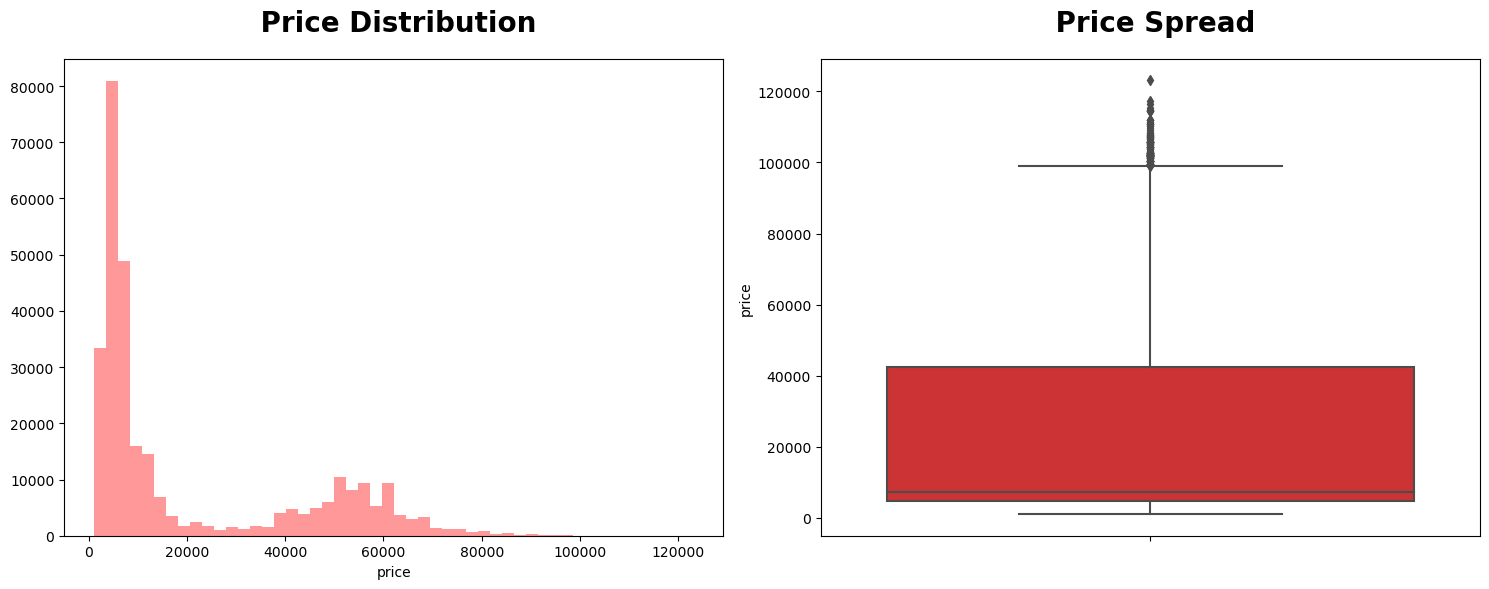

In [273]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(bus["price"],color="red",kde=False)
plt.title(" Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=bus["price"],palette="Set1")
plt.title(" Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

In [274]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex = True, figsize = (8,5),gridspec_kw = {"height_ratios": (.2, .8)})
    ax[0].set_title(title)
    sns.boxplot(x = col, data = df, ax = ax[0],palette="inferno")
    ax[0].set(yticks = [])
    sns.histplot(x = col, data = df, ax = ax[1],palette="cividis")
    ax[1].set_xlabel(col)
    plt.axvline(df[col].mean(), color = 'Black', label = 'mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color = 'red', label = 'median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color = 'purple', label = 'mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor = (1, 1.03), ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.tight_layout()
    plt.show()

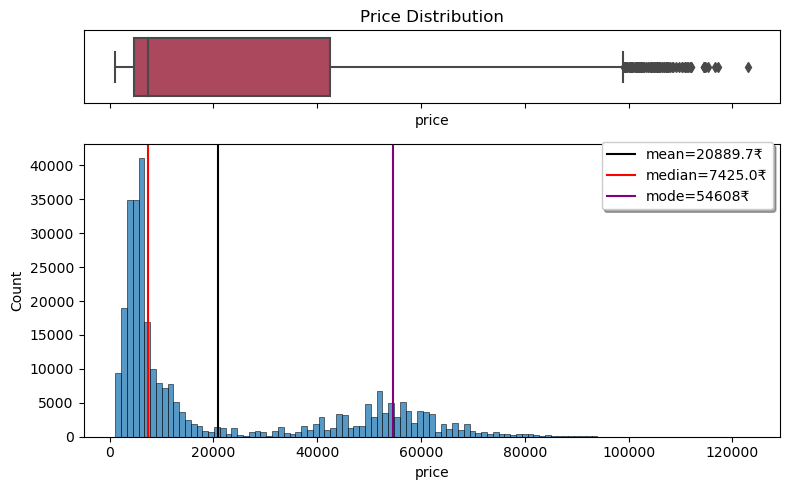

In [275]:
num_plot(bus, 'price', 'Price Distribution','₹')

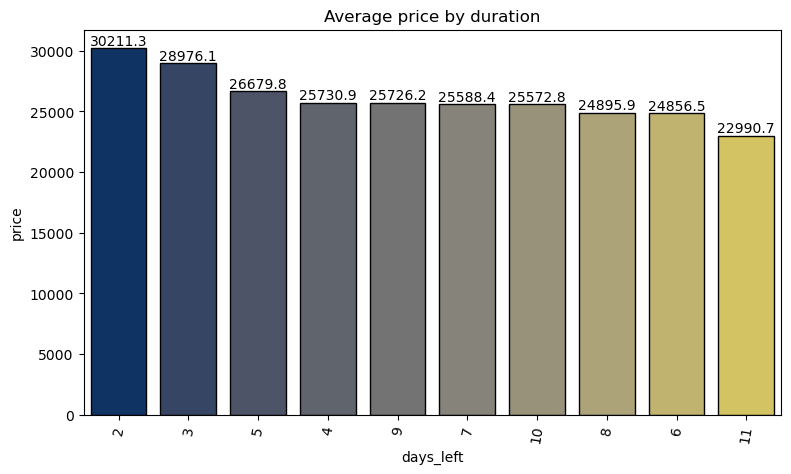

In [276]:
#bus['days_left'].value_counts()
company_list = bus.groupby("days_left")["price"].mean().sort_values(ascending=False).index[0:10].tolist()


plt.figure(figsize = (9,5))
ax=sns.barplot(x = 'days_left', y = 'price', data = bus[bus['days_left'].isin(company_list)],
                order = company_list, 
                palette = 'cividis', 
                ci = False,
                edgecolor = "black")
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Average price by duration')
plt.show()

In [277]:
bus.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_carrier
0,0,Spicejet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,SG
1,1,Spicejet,SG-8157,Delhi,Early Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,SG
2,2,Airasia,I5-764,Delhi,Early Morning,zero,Early Morning,Mumbai,Economy,2.17,1,5956,I5
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,UK
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,UK


In [278]:

econ=pd.read_csv("C:/Users/JUNIOR/Favorites/Links/new/jUPYTER/projjjjjjjjjject/real word projects/Mine/economy.csv")
econ.head()


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [279]:
econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


<Axes: >

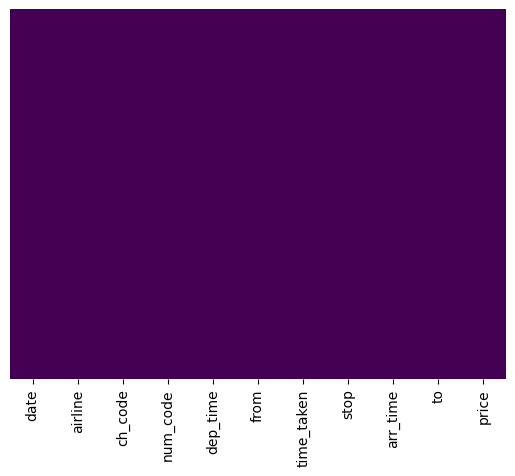

In [280]:
sns.heatmap(econ.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [281]:
econ["airline"]=econ["airline"].apply(lambda x:x.capitalize())
econ["airline"].value_counts()

Vistara      67270
Air india    47996
Indigo       43120
Go first     23177
Airasia      16098
Spicejet      9011
Starair         61
Trujet          41
Name: airline, dtype: int64

In [282]:
econ["ch_code"].value_counts()

UK    67270
AI    47996
6E    43120
G8    23177
I5    16098
SG     9011
S5       61
2T       41
Name: ch_code, dtype: int64

In [283]:
econ["time_taken"]=econ["time_taken"].replace('1.01h m', '1h 1m')
econ["time_taken"]=econ["time_taken"].replace('1.02h m', '1h 2m')
econ["time_taken"]=econ["time_taken"].replace('1.03h m', '1h 3m')
econ["time_taken"].unique()

array(['02h 10m', '02h 20m', '02h 15m', '02h 05m', '12h 15m', '16h 20m',
       '11h 45m', '14h 30m', '15h 40m', '03h 45m', '02h 30m', '05h 50m',
       '08h 00m', '06h 00m', '14h 40m', '16h 10m', '18h 00m', '23h 10m',
       '24h 10m', '08h 50m', '04h 30m', '15h 15m', '11h 00m', '19h 05m',
       '22h 50m', '26h 25m', '17h 45m', '19h 35m', '26h 40m', '15h 10m',
       '20h 50m', '11h 25m', '22h 15m', '26h 00m', '21h 45m', '03h 50m',
       '04h 25m', '07h 40m', '08h 20m', '10h 25m', '23h 45m', '19h 30m',
       '06h 30m', '12h 25m', '21h 05m', '28h 10m', '28h 15m', '09h 15m',
       '17h 55m', '07h 05m', '13h 50m', '07h 35m', '15h 50m', '24h 25m',
       '04h 10m', '04h 15m', '05h 05m', '29h 20m', '17h 00m', '27h 10m',
       '24h 45m', '05h 45m', '12h 45m', '13h 45m', '17h 50m', '05h 30m',
       '23h 50m', '05h 00m', '26h 30m', '12h 50m', '08h 55m', '11h 10m',
       '12h 10m', '15h 35m', '15h 45m', '07h 55m', '13h 15m', '16h 00m',
       '22h 45m', '06h 20m', '07h 15m', '30h 05m', 

In [284]:
def time_for_flight(x):
    parts=x.strip()
    parts=x.split(" ")
    try:
        a=int(parts[1][0:-1])
        b=int(parts[0][0:-1])
    except ValueError:
              return x
              
              
    if a >= 30:
        return str(b + 1)
    elif a < 30:
        return str(b) 
    else:
        return x           
econ["total_time"]=econ["time_taken"].apply(time_for_flight)   
econ["total_time"].unique()

array(['2', '12', '16', '15', '4', '3', '6', '8', '18', '23', '24', '9',
       '5', '11', '19', '26', '20', '27', '21', '22', '10', '7', '28',
       '14', '29', '17', '25', '13', '30', '31', '33', '37', '32', '36',
       '35', '40', '34', '1', '38', '42', '39', '41', '48', '50', '47',
       '46', '45'], dtype=object)

In [285]:
econ['date'] = pd.to_datetime(econ['date'])
econ['Day_of_Week'] = econ['date'].dt.strftime('%A')
econ.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,total_time,Day_of_Week
0,2022-11-02,Spicejet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",2,Wednesday
1,2022-11-02,Spicejet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",2,Wednesday
2,2022-11-02,Airasia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",2,Wednesday
3,2022-11-02,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",2,Wednesday
4,2022-11-02,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",2,Wednesday


In [286]:
def precise_time(x):
    time=int(x.split(":")[0])
    if time>=4 and time<=8:
        return "Early Morning"
    if time>=9 and time <12:
        return "Morning"
    if time >=12 and time<17:
        return "Afernoon"
    if time >=17 and time <21:
        return "Evening"
    if time >=21 and time <23:
        return "Late Night"
    if time >=23 and time <=3:
        return "Night"
econ["dep_time_well"]=econ["dep_time"].apply(precise_time)
econ.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,total_time,Day_of_Week,dep_time_well
0,2022-11-02,Spicejet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",2,Wednesday,Evening
1,2022-11-02,Spicejet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",2,Wednesday,Early Morning
2,2022-11-02,Airasia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",2,Wednesday,Early Morning
3,2022-11-02,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",2,Wednesday,Morning
4,2022-11-02,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",2,Wednesday,Early Morning


In [287]:
def precise_time(x):
    time=int(x.split(":")[0])
    if time>=4 and time<=8:
        return "Early Morning"
    if time>=9 and time <12:
        return "Morning"
    if time >=12 and time<17:
        return "Afernoon"
    if time >=17 and time <21:
        return "Evening"
    if time >=21 and time <23:
        return "Late Night"
    if time >=23 and time <=3:
        return "Night"
econ["arr_time_well"]=econ["arr_time"].apply(precise_time)
econ.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,total_time,Day_of_Week,dep_time_well,arr_time_well
0,2022-11-02,Spicejet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",2,Wednesday,Evening,Late Night
1,2022-11-02,Spicejet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",2,Wednesday,Early Morning,Early Morning
2,2022-11-02,Airasia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",2,Wednesday,Early Morning,Early Morning
3,2022-11-02,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",2,Wednesday,Morning,Afernoon
4,2022-11-02,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",2,Wednesday,Early Morning,Morning


In [288]:
econ["price"]=econ["price"].apply(lambda x:x.replace(",",""))
econ["price"]=econ["price"].apply(lambda x: int(x))

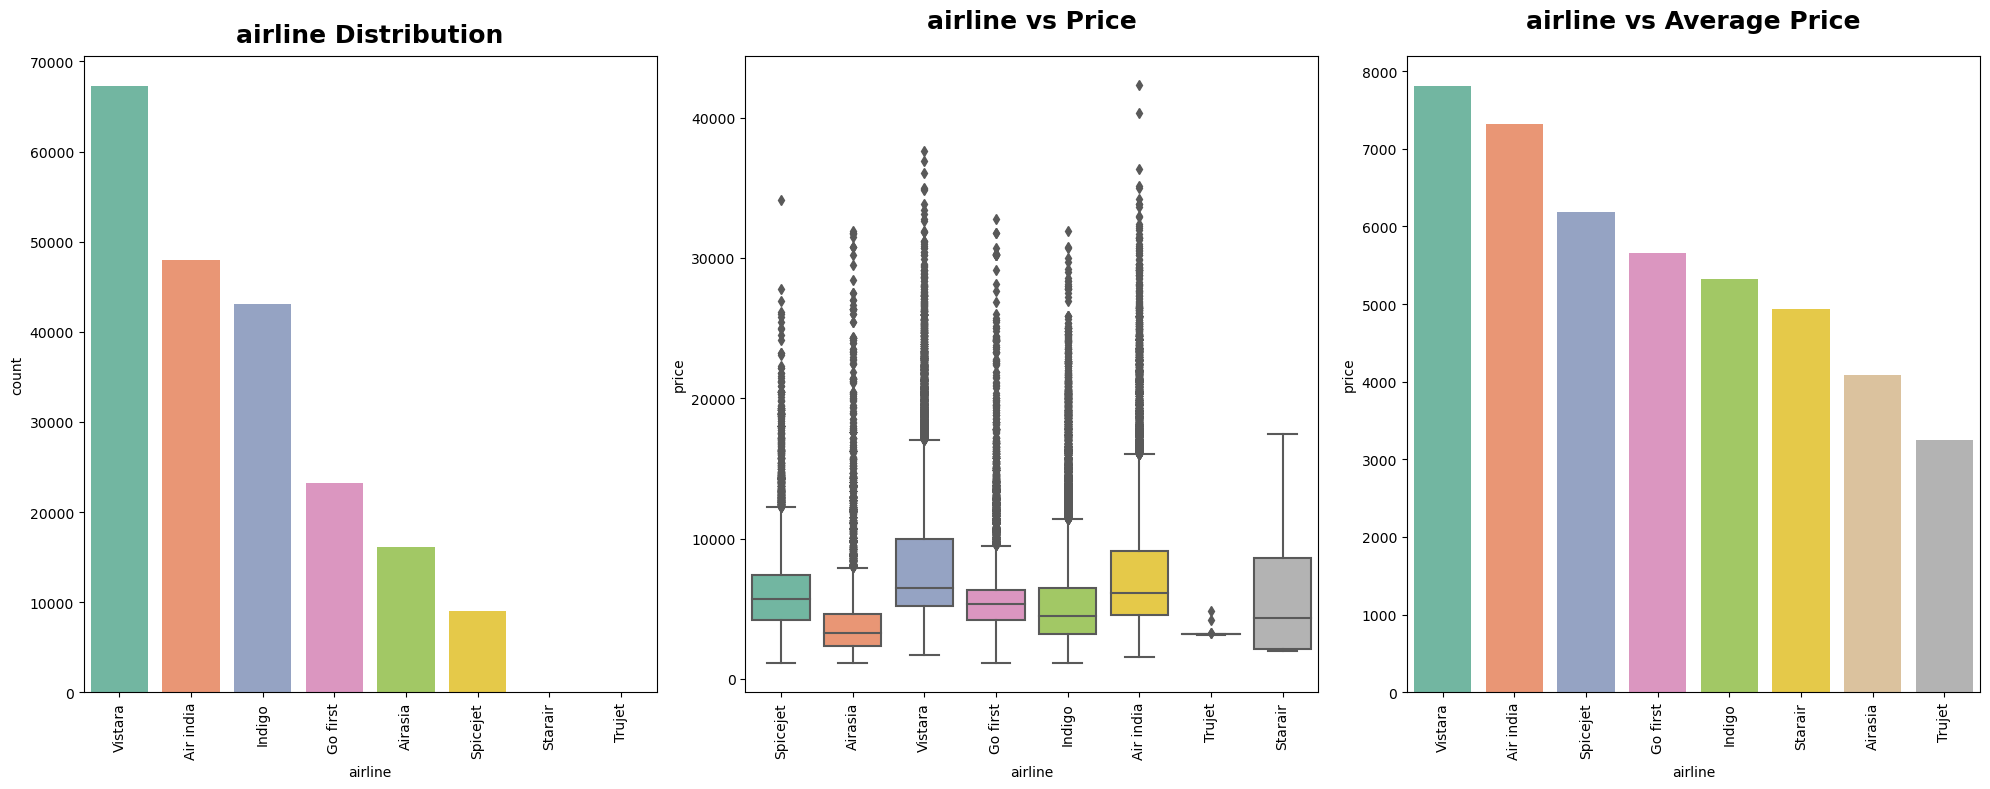

In [289]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=econ,palette="Set2",order=econ[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y='price',data=econ,palette="Set2")
    plt.title(f"{cols} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(econ.groupby(cols)['price'].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="Set2")
    plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

categorical_visualization("airline")

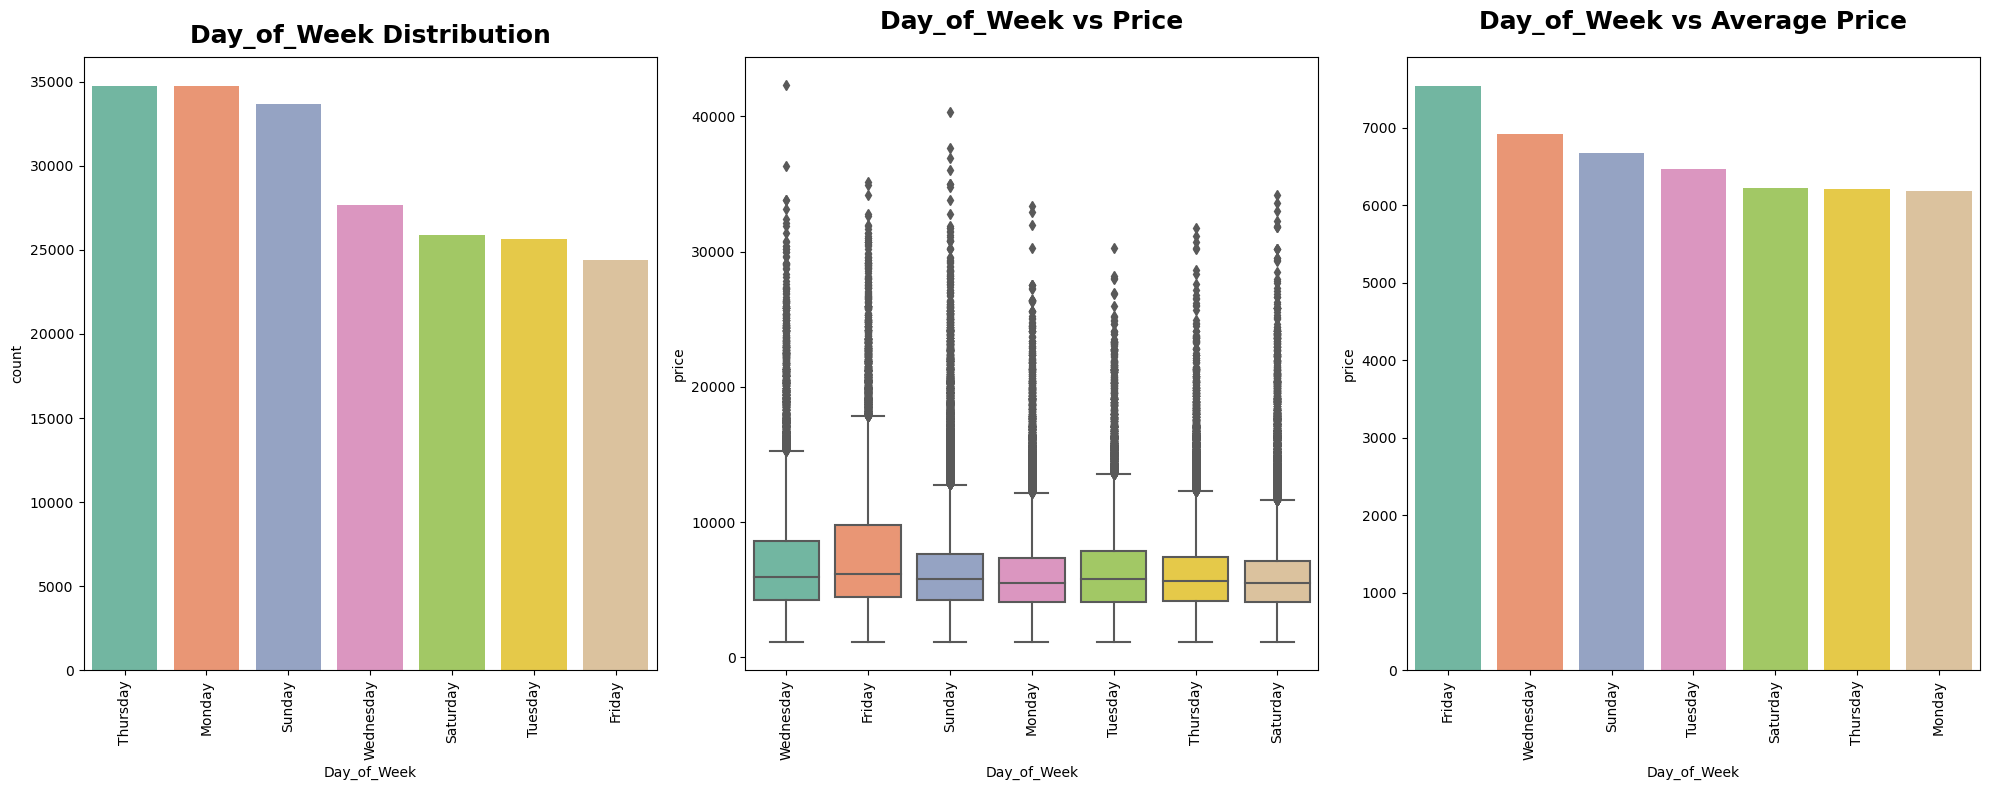

In [290]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=econ,palette="Set2",order=econ[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y='price',data=econ,palette="Set2")
    plt.title(f"{cols} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(econ.groupby(cols)['price'].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="Set2")
    plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

categorical_visualization("Day_of_Week")

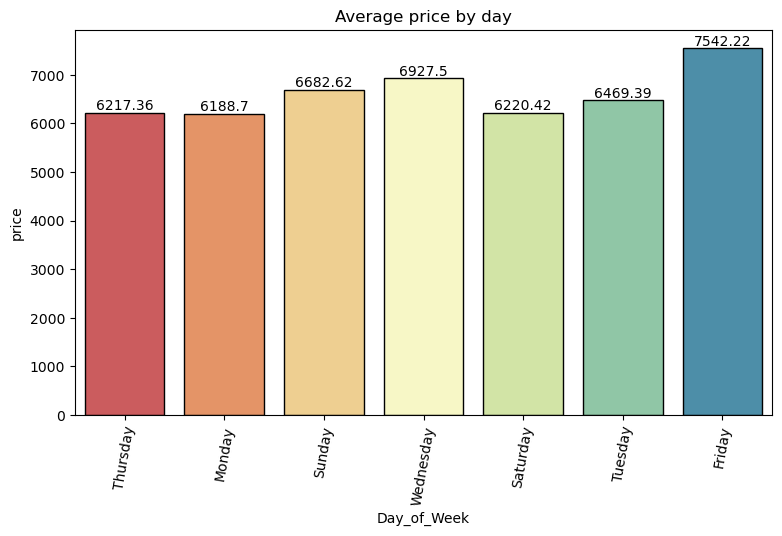

In [291]:
econ['Day_of_Week'].value_counts()
company_list = econ['Day_of_Week'].value_counts().index[0:].tolist()


plt.figure(figsize = (9,5))
ax=sns.barplot(x = 'Day_of_Week', y = 'price', data = econ[econ['Day_of_Week'].isin(company_list)],
                order = company_list, 
                palette = 'Spectral', 
                ci = False,
                edgecolor = "black")
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Average price by day')
plt.show()

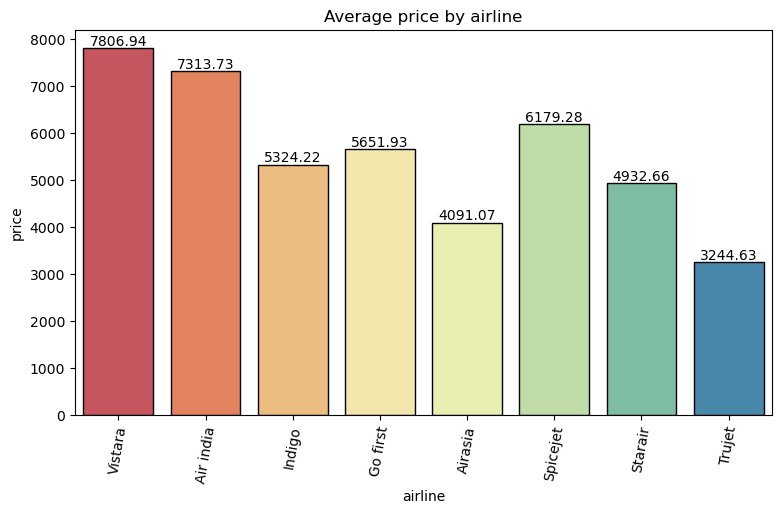

In [292]:
econ['airline'].value_counts()
company_list = econ['airline'].value_counts().index[0:].tolist()


plt.figure(figsize = (9,5))
ax=sns.barplot(x = 'airline', y = 'price', data = econ[econ['airline'].isin(company_list)],
                order = company_list, 
                palette = 'Spectral', 
                ci = False,
                edgecolor = "black")
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Average price by airline')
plt.show()

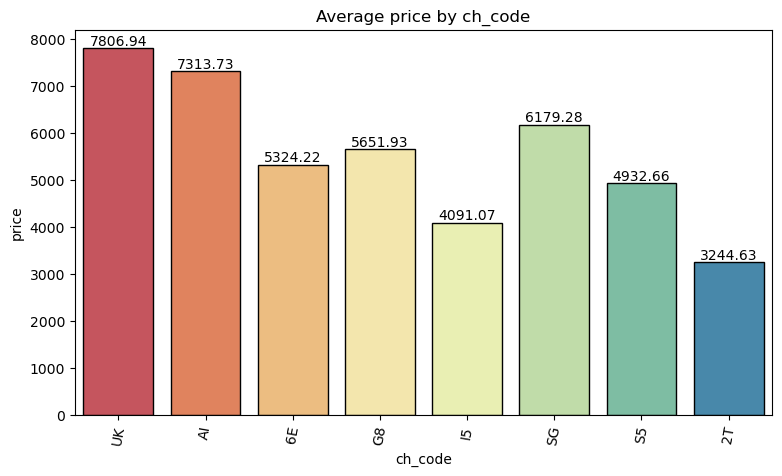

In [293]:
econ['ch_code'].value_counts()
company_list = econ['ch_code'].value_counts().index[0:].tolist()


plt.figure(figsize = (9,5))
ax=sns.barplot(x = 'ch_code', y = 'price', data = econ[econ['ch_code'].isin(company_list)],
                order = company_list, 
                palette = 'Spectral', 
                ci = False,
                edgecolor = "black")
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Average price by ch_code')
plt.show()

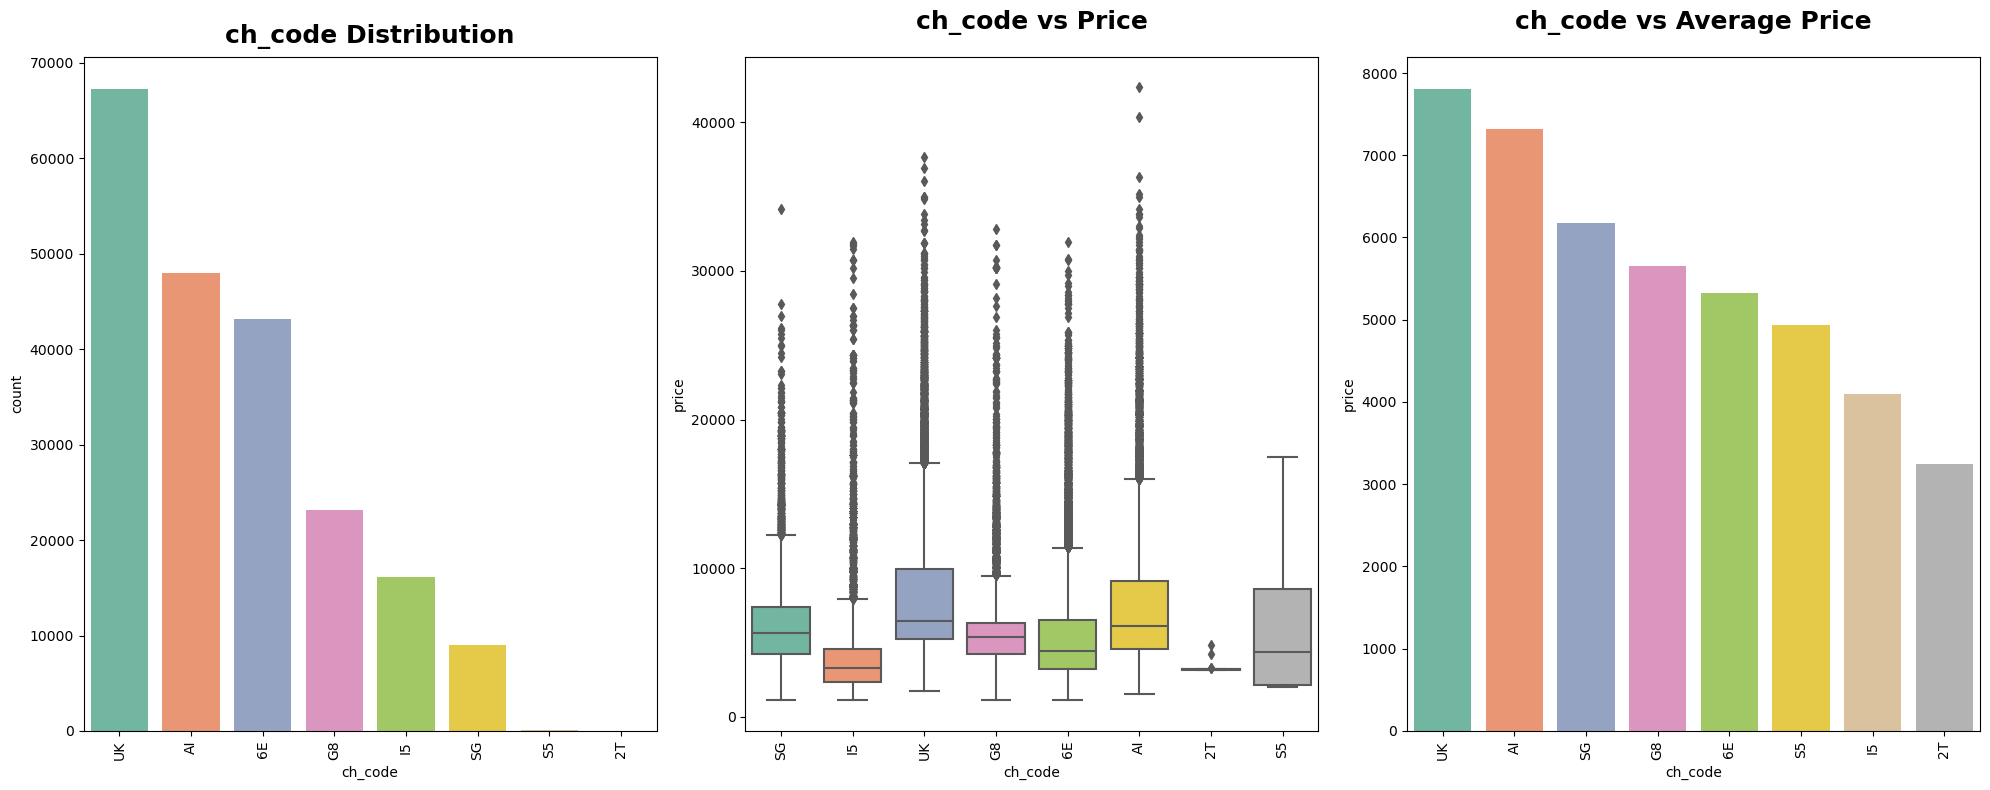

In [294]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=econ,palette="Set2",order=econ[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y='price',data=econ,palette="Set2")
    plt.title(f"{cols} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(econ.groupby(cols)['price'].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="Set2")
    plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

categorical_visualization("ch_code")

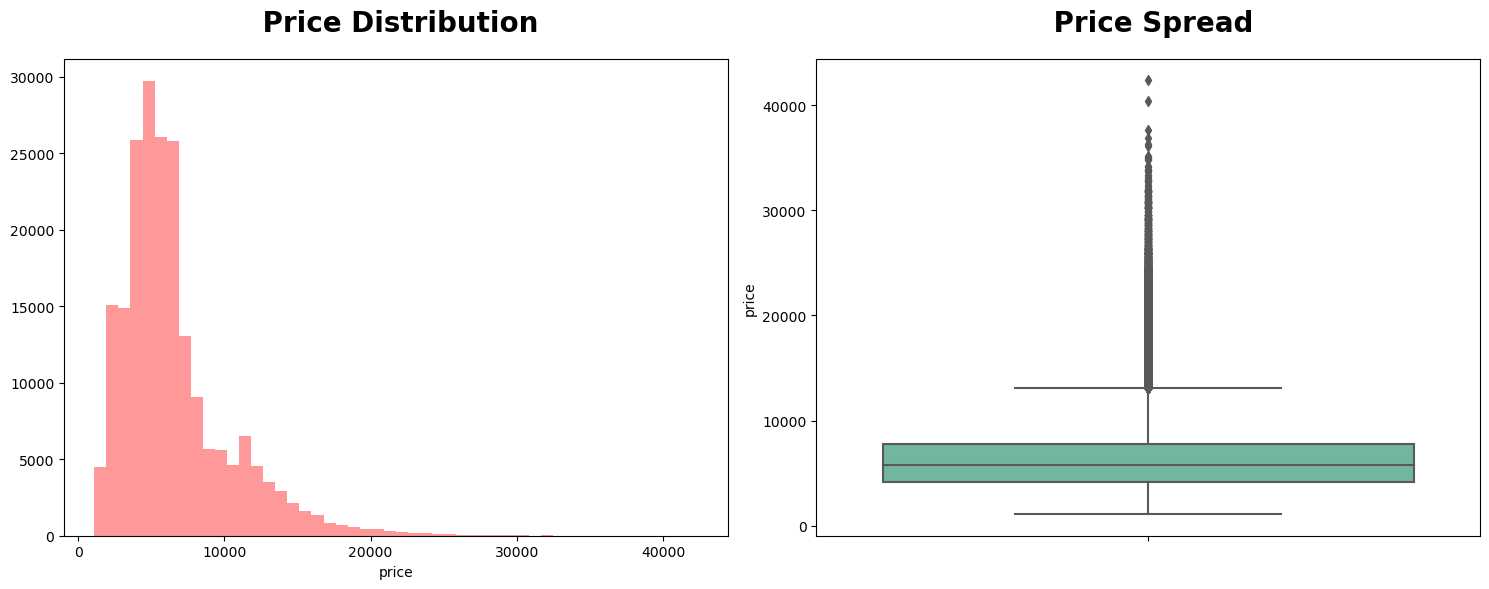

In [295]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(econ["price"],color="red",kde=False)
plt.title(" Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=econ["price"],palette="Set2")
plt.title(" Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

In [296]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex = True, figsize = (8,5),gridspec_kw = {"height_ratios": (.2, .8)})
    ax[0].set_title(title)
    sns.boxplot(x = col, data = df, ax = ax[0])
    ax[0].set(yticks = [])
    sns.histplot(x = col, data = df, ax = ax[1])
    ax[1].set_xlabel(col)
    plt.axvline(df[col].mean(), color = 'g', label = 'mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color = 'red', label = 'median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color = 'purple', label = 'mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor = (1, 1.03), ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.tight_layout()
    plt.show()

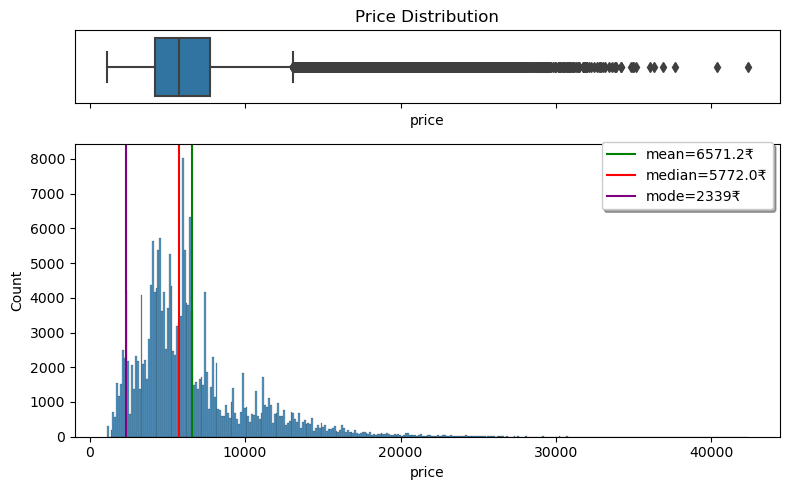

In [297]:
num_plot(econ, 'price', 'Price Distribution','₹')

In [298]:
econ.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,total_time,Day_of_Week,dep_time_well,arr_time_well
0,2022-11-02,Spicejet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,2,Wednesday,Evening,Late Night
1,2022-11-02,Spicejet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,2,Wednesday,Early Morning,Early Morning
2,2022-11-02,Airasia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,2,Wednesday,Early Morning,Early Morning
3,2022-11-02,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,2,Wednesday,Morning,Afernoon
4,2022-11-02,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,2,Wednesday,Early Morning,Morning


In [299]:
econ["stop"].nunique()

37

In [300]:
econ[["dep_time","arr_time_well"]]

,dep_time,arr_time_well
0,18:55,Late Night
1,06:20,Early Morning
2,04:25,Early Morning
3,10:20,Afernoon
4,08:50,Morning
...,...,...
206769,07:05,Evening
206770,07:05,Evening
206771,12:30,Morning
206772,09:45,Morning


In [301]:
 econ.dep_time_well.unique()

array(['Evening', 'Early Morning', 'Morning', 'Afernoon', 'Late Night',
       None], dtype=object)

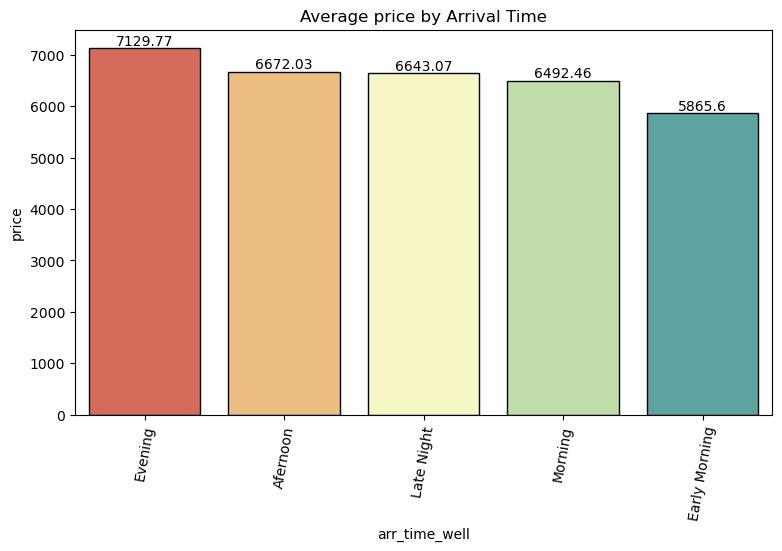

In [302]:
econ['arr_time_well'].value_counts()
company_list = econ['arr_time_well'].value_counts().index[0:].tolist()


plt.figure(figsize = (9,5))
ax=sns.barplot(x = 'arr_time_well', y = 'price', data = econ[econ['arr_time_well'].isin(company_list)],
                order = company_list, 
                palette = 'Spectral', 
                ci = False,
                edgecolor = "black")
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Average price by Arrival Time')
plt.show()

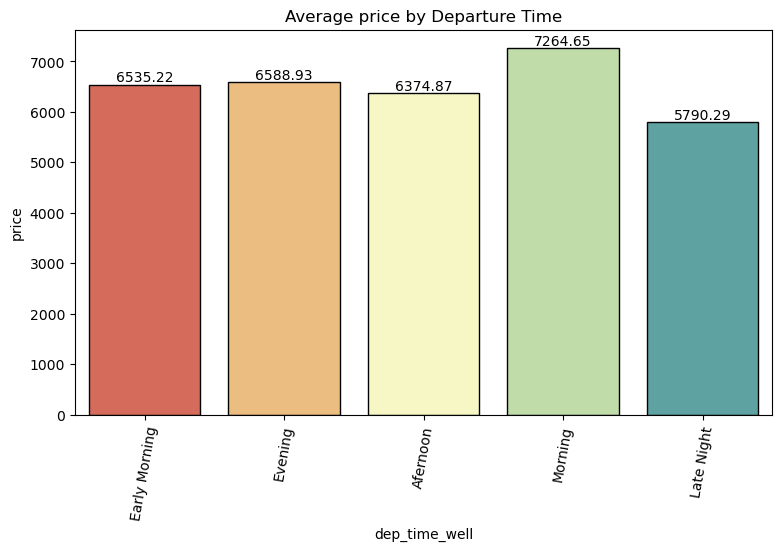

In [303]:
econ['dep_time_well'].value_counts()
company_list = econ['dep_time_well'].value_counts().index[0:].tolist()


plt.figure(figsize = (9,5))
ax=sns.barplot(x = 'dep_time_well', y = 'price', data = econ[econ['dep_time_well'].isin(company_list)],
                order = company_list, 
                palette = 'Spectral', 
                ci = False,
                edgecolor = "black")
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Average price by Departure Time')
plt.show()

<Axes: xlabel='total_time', ylabel='price'>

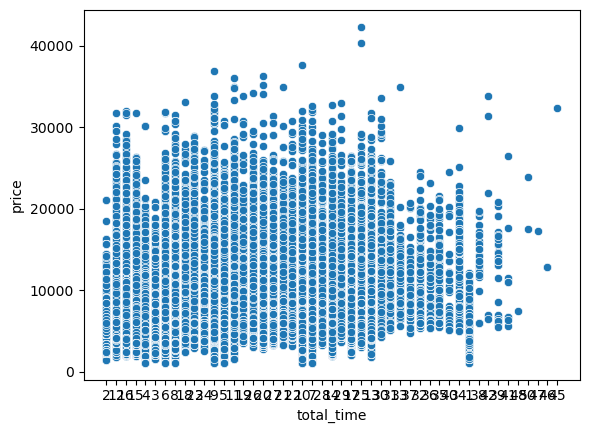

In [304]:
sns.scatterplot(x="total_time",y="price",data=econ)

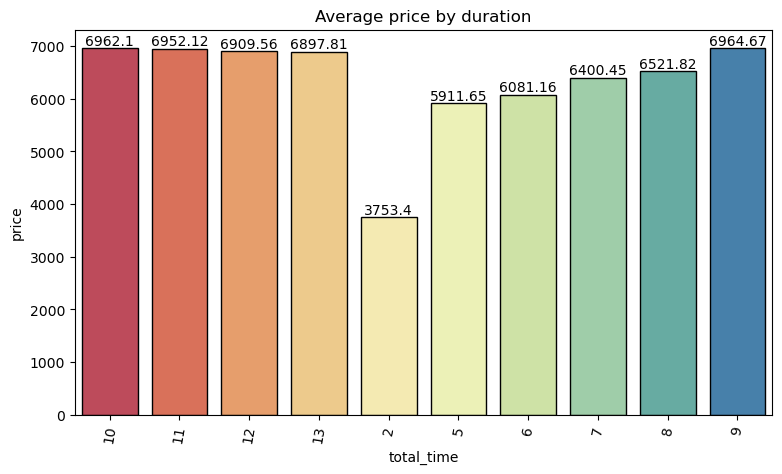

In [305]:
econ['total_time'].value_counts()
company_list = econ['total_time'].value_counts().index[0:10]
company_list = sorted(company_list.tolist())


plt.figure(figsize = (9,5))
ax=sns.barplot(x = 'total_time', y = 'price', data = econ[econ['total_time'].isin(company_list)],
                order = company_list, 
                palette = 'Spectral', 
                ci = False,
                edgecolor = "black")
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Average price by duration')
plt.show()

In [306]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import Lars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
linear=LinearRegression()



standard=MinMaxScaler()
alpha = 1.0  # Regularization strength
ridge_model = Ridge(alpha=alpha)
alpha = 0.1  # Regularization strength
lasso_model = Lasso(alpha=alpha)
bayesian_ridge = BayesianRidge()
ard_regression = ARDRegression()
lars = Lars()
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=5) 
passive_aggressive_regressor = PassiveAggressiveRegressor(C=1.0, max_iter=1000, random_state=42)
dt_regressor = DecisionTreeRegressor(random_state=0)
ran=RandomForestRegressor(n_estimators=20)

gradient=GradientBoostingRegressor(learning_rate=0.1,n_estimators=10)
hist=HistGradientBoostingRegressor(learning_rate=0.1,l2_regularization=0.1)
ada=AdaBoostRegressor(n_estimators=10,learning_rate=0.2,random_state=40)
knn=KNeighborsRegressor(n_neighbors=10)
el=ElasticNet(alpha=0.1)

In [307]:
bus.drop("Unnamed: 0",axis=1,inplace=True)
bus.drop("flight",axis=1,inplace=True)
num_col=["source_city","destination_city","airline","departure_time","stops","arrival_time","class","flight_carrier"]
pd.get_dummies(bus,num_col,drop_first=True)

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for cols in num_col:
    bus[cols]=label.fit_transform(bus[cols])
bus.head()
x=bus.drop("price",axis=1)
y=bus.price

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=50)


x_train_new=standard.fit_transform(x_train)
x_test_new=standard.transform(x_test)

# FOR TRAINING DATASET

These are the accuracy scores for the Training data  

 For Linear Regression Algorithm, we had an accuracy of 90.46886295843088
 For  Ridge Algorithm, we had an accuracy of 90.46886266187408
 For Lasso Regression Algorithm, we had an accuracy of 90.4688627840831
 For Bayesian Algorithm, we had an accuracy of 90.46886294258204
 For ARDRegression Algorithm, we had an accuracy of 90.4688174178597
 For Lars Algorithm, we had an accuracy of 90.46886295843088
 For  Orthogonal Matching Pursuit Algorithm, we had an accuracy of 90.3646579547439
 For Passive Aggression Regressor Algorithm, we had an accuracy of 89.8020968728833
 For Decision TreeRegressor Algorithm, we had an accuracy of 99.97437090483592
 For Random Forest Regressor Algorithm, we had an accuracy of 99.70266779082993
 For Gradient Boost Regressor Algorithm, we had an accuracy of 82.13151775481799
 For Hist Regressor Algorithm, we had an accuracy of 96.95025374469382
 For Adaboost Forest Regressor Algorithm, we had an accuracy o

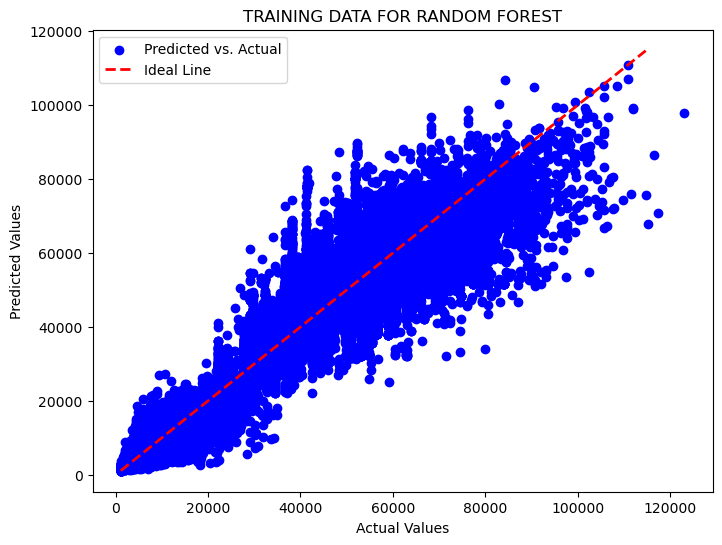

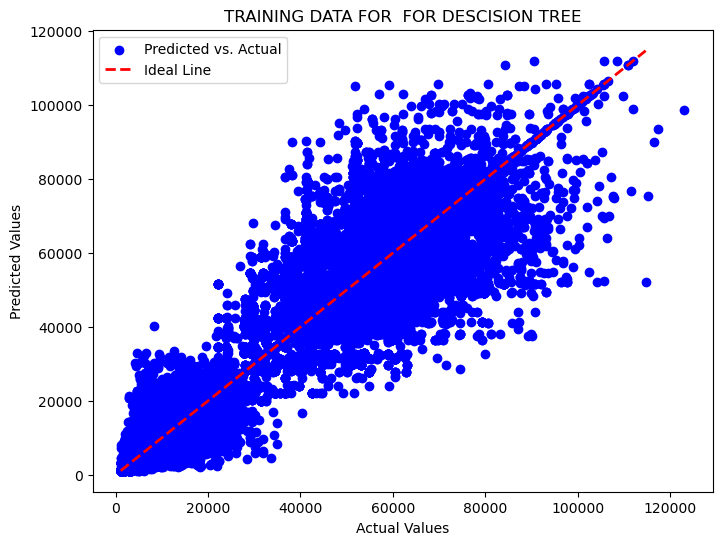

In [308]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=50)



x_train_new=standard.fit_transform(x_train)
x_test_new=standard.transform(x_test)
def get_score(model):
    model.fit(x_train_new,y_train)
    pred=model.predict(x_train_new)
    score=model.score(x_train_new,y_train)
    return score*100

print("These are the accuracy scores for the Training data  \n")
print(f' For Linear Regression Algorithm, we had an accuracy of {get_score(linear)}')
print(f' For  Ridge Algorithm, we had an accuracy of {get_score(ridge_model)}')
print(f' For Lasso Regression Algorithm, we had an accuracy of {get_score(lasso_model)}')
print(f' For Bayesian Algorithm, we had an accuracy of {get_score(bayesian_ridge)}')
print(f' For ARDRegression Algorithm, we had an accuracy of {get_score(ard_regression)}')
print(f' For Lars Algorithm, we had an accuracy of {get_score(lars)}')
print(f' For  Orthogonal Matching Pursuit Algorithm, we had an accuracy of {get_score(omp)}')
print(f' For Passive Aggression Regressor Algorithm, we had an accuracy of {get_score(passive_aggressive_regressor)}')
print(f' For Decision TreeRegressor Algorithm, we had an accuracy of {get_score(dt_regressor)}')
print(f' For Random Forest Regressor Algorithm, we had an accuracy of {get_score(ran)}')


print(f' For Gradient Boost Regressor Algorithm, we had an accuracy of {get_score(gradient)}')
print(f' For Hist Regressor Algorithm, we had an accuracy of {get_score(hist)}')
print(f' For Adaboost Forest Regressor Algorithm, we had an accuracy of {get_score(ada)}')
print(f' For KNN Regressor Algorithm, we had an accuracy of {get_score(knn)}')
print(f' For Elastic Net Algorithm, we had an accuracy of {get_score(el)}')



x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.5)
x_train_new=standard.fit_transform(x_train)
x_test_new=standard.transform(x_test)
pred=ran.predict(x_train_new)


# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train,pred, color='b', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TRAINING DATA FOR RANDOM FOREST")
plt.legend()



x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.5)
x_train_new=standard.fit_transform(x_train)
x_test_new=standard.transform(x_test)
pred=dt_regressor.predict(x_train_new)


# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train,pred, color='b', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TRAINING DATA FOR  FOR DESCISION TREE")
plt.legend()



# FOR TESTING DATASET

In [309]:

def get_score(model):
    model.fit(x_train_new,y_train)
    pred=model.predict(x_test_new)
    score=model.score(x_test_new,y_test)
    return score*100

print("These are the accuracy scores for the Testing data  \n")
print(f' For Linear Regression Algorithm, we had an accuracy of {get_score(linear)}')
print(f' For  Ridge Algorithm, we had an accuracy of {get_score(ridge_model)}')
print(f' For Lasso Regression Algorithm, we had an accuracy of {get_score(lasso_model)}')
print(f' For Bayesian Algorithm, we had an accuracy of {get_score(bayesian_ridge)}')
print(f' For ARDRegression Algorithm, we had an accuracy of {get_score(ard_regression)}')
print(f' For Lars Algorithm, we had an accuracy of {get_score(lars)}')
print(f' For  Orthogonal Matching Pursuit Algorithm, we had an accuracy of {get_score(omp)}')
print(f' For Passive Aggression Regressor Algorithm, we had an accuracy of {get_score(passive_aggressive_regressor)}')
print(f' For Decision TreeRegressor Algorithm, we had an accuracy of {get_score(dt_regressor)}')
print(f' For Random Forest Regressor Algorithm, we had an accuracy of {get_score(ran)}')
print(f' For Gradient Boost Regressor Algorithm, we had an accuracy of {get_score(gradient)}')
print(f' For Hist Regressor Algorithm, we had an accuracy of {get_score(hist)}')
print(f' For Adaboost Forest Regressor Algorithm, we had an accuracy of {get_score(ada)}')
print(f' For KNN Regressor Algorithm, we had an accuracy of {get_score(knn)}')
print(f' For Elastic Net Algorithm, we had an accuracy of {get_score(el)}')







These are the accuracy scores for the Testing data  

 For Linear Regression Algorithm, we had an accuracy of 90.5246832876268
 For  Ridge Algorithm, we had an accuracy of 90.5246726201828
 For Lasso Regression Algorithm, we had an accuracy of 90.52467562944659
 For Bayesian Algorithm, we had an accuracy of 90.52468083088154
 For ARDRegression Algorithm, we had an accuracy of 90.52469460230866
 For Lars Algorithm, we had an accuracy of 90.5246832876268
 For  Orthogonal Matching Pursuit Algorithm, we had an accuracy of 90.41657322751922
 For Passive Aggression Regressor Algorithm, we had an accuracy of 89.83551985069842
 For Decision TreeRegressor Algorithm, we had an accuracy of 97.42055897869272
 For Random Forest Regressor Algorithm, we had an accuracy of 98.36868575504278
 For Gradient Boost Regressor Algorithm, we had an accuracy of 82.16003512573289
 For Hist Regressor Algorithm, we had an accuracy of 96.94427019278106
 For Adaboost Forest Regressor Algorithm, we had an accuracy o

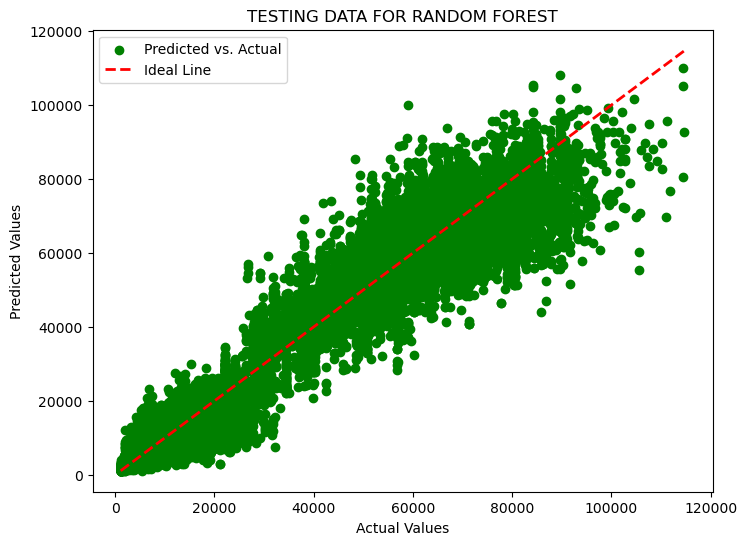

In [310]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.5)
x_train_new=standard.fit_transform(x_train)
x_test_new=standard.transform(x_test)
pred=ran.predict(x_test_new)
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test,pred, color='g', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TESTING DATA FOR RANDOM FOREST")
plt.legend()


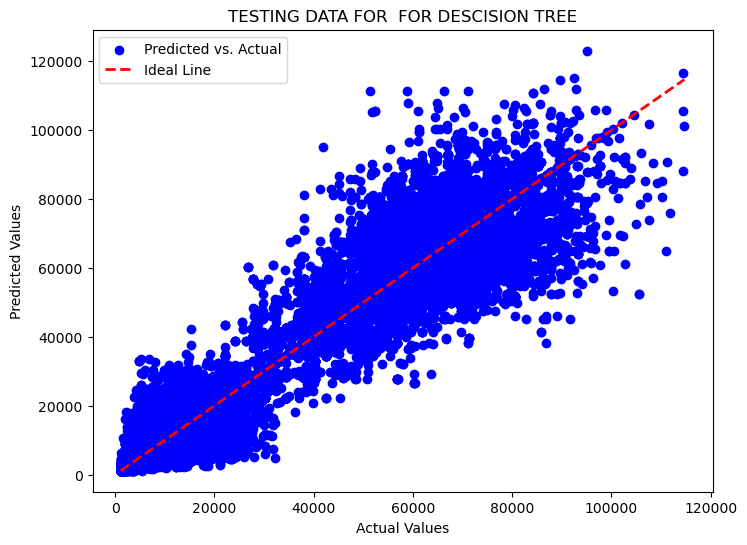

In [311]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.5)
x_train_new=standard.fit_transform(x_train)
x_test_new=standard.transform(x_test)
pred=dt_regressor.predict(x_test_new)


# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test,pred, color='b', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TESTING DATA FOR  FOR DESCISION TREE")
plt.legend()


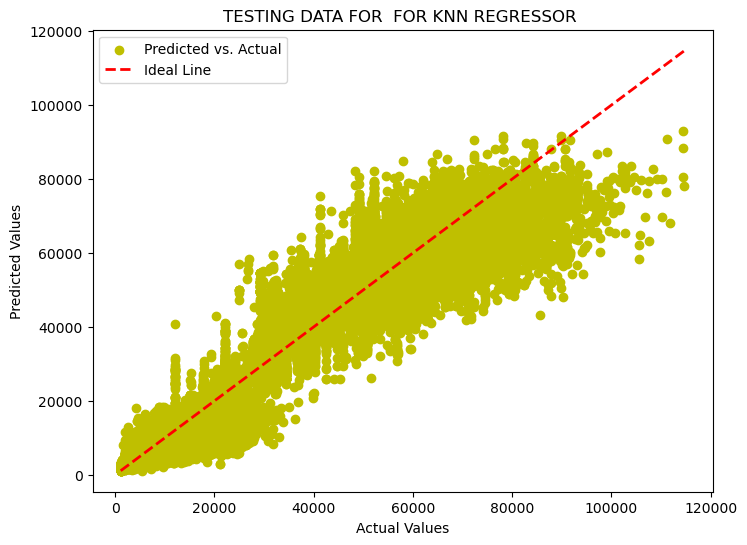

In [312]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.5)
x_train_new=standard.fit_transform(x_train)
x_test_new=standard.transform(x_test)
pred=knn.predict(x_test_new)


# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test,pred, color='y', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TESTING DATA FOR  FOR KNN REGRESSOR ")
plt.legend()


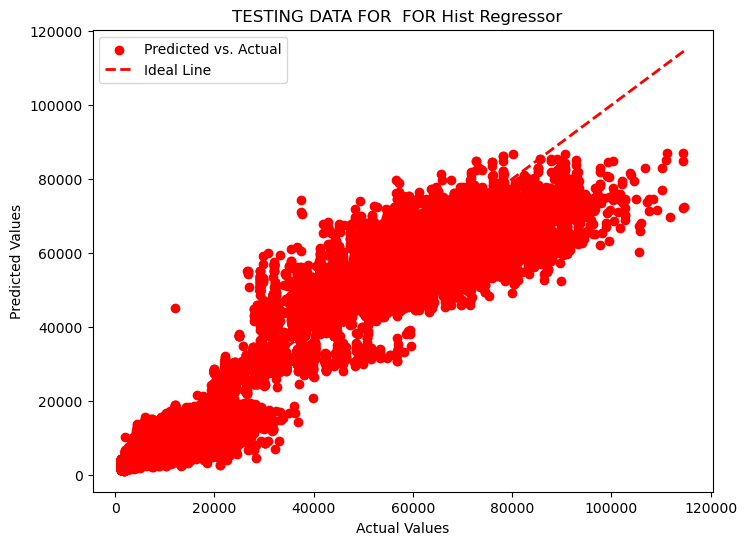

In [313]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.5)
x_train_new=standard.fit_transform(x_train)
x_test_new=standard.transform(x_test)
pred=hist.predict(x_test_new)


# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test,pred, color='r', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TESTING DATA FOR  FOR Hist Regressor  ")
plt.legend()


We can see that the best model for our regression problem was Random Forest regresssor , Decison tree , KNN regressor and Hist Regressor

We can use any for our regression problem